### Table of Contents

* [Chapter 1: Introduction](#chapter1)
* [Chapter 2 : Exploratory Data Analysis](#chapter2)
    * [Section 2.1 Binary/Discret value distribution](#section_2_1)
    * [Section 2.2 Continuous value](#section_2_2)
* [Chapter 3 : Preprocessing](#chapter2)
    * [Section 3.1 Variable conversion](#section_2_1)
    * [Section 3.2 Missing value processing](#section_2_2)
* [Chapter 4 : Correlations](#chapter2)
    * [Section 4.1 Correlations with TARGET_FLAG](#section_2_1)
    * [Section 4.2 Correlations with TARGET_AMT](#section_2_2)
    * [Section 4.3 Standardization](#section_2_2)
* [Chapter 5 : Model building](#chapter2)
    * [Section 5.1 Classification](#section_2_1)
    * [Section 5.2 Regression](#section_2_2)
* [Chapter 6 : Conclusion](#chapter2)
* [Chapter 7 : Classification and prediction based on Test set](#chapter2)


# **1. Introduction**

During this project, we will explore the dataset about Auto insurance claims. This dataset contains approximately 8000 records representing a customer at an auto insurance company. Our target variable is "TARGET_FLAG" and "TARGET_AMT". If TARGET_FLAG = 1, there is a claim (by car acciden for example). TARGET_AMT means the amount of the compensation for this claim. So, if TARGET_AMT > 0, TARGET_FLAG =1. Otherwise, TARGET_FLAG = 0.
Here is the description for all of the variables and assumptions :


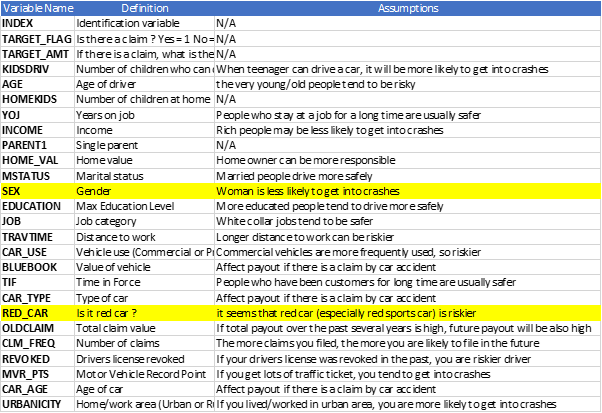

# **Objective :**
There are two objectives :
* we will build a classification models based on traning data to know if someone with sevral characteristics will file or not in the test data **(TARGET_FLAG)**. 
* we will determine the amount of compensation related with those claims.**(TARGET_AMT)**

In [78]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,confusion_matrix, classification_report, auc
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from fancyimpute import IterativeImputer
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px



train = pd.read_csv(r'C:/Users/taehe/Documents/Jupyter Project/train_auto.csv')
test = pd.read_csv(r'C:/Users/taehe/Documents/Jupyter Project/test_auto.csv')


# **2. Exploratory Data Analysis (EDA)**

Here, we will explore the data to know the format of data and missing value.

# **Data type and format verification**

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

In [80]:
train.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


We see that eventhough the variables like income,bluebook,home_val,old_claim should be numeric type (float or int), their type is object because of dollar expression ('$')
So, it is necessary to convert from object type to numerical variable because it will be much more comportable when we apply sevral algorithm.

In [81]:
def converting(data):
    data = data.str.replace('$', '').str.replace(',','')
    data = pd.to_numeric(data).astype('float')
    return data

In [82]:
conversion_list = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']
for i in conversion_list:
    train[i] = converting(train[i])

<ipython-input-81-67c39e1909d1>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   float64
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   float64
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   float64
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

In [84]:
train.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,67349.0,No,0.0,...,14230.0,11,Minivan,yes,4461.0,2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,91449.0,No,257252.0,...,14940.0,1,Minivan,yes,0.0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,16039.0,No,124191.0,...,4010.0,4,z_SUV,no,38690.0,2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,306251.0,...,15440.0,7,Minivan,yes,0.0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,114986.0,No,243925.0,...,18000.0,1,z_SUV,no,19217.0,2,Yes,3,17.0,Highly Urban/ Urban


Finally, we removed '$' and converted the columns like 'BLUEBOOK','OLDCLAIM','INCOME','HOME_VAL' to numerical values 

Before treating the missing value, let's see how our data is distributed.

# **Discret variable distribution**

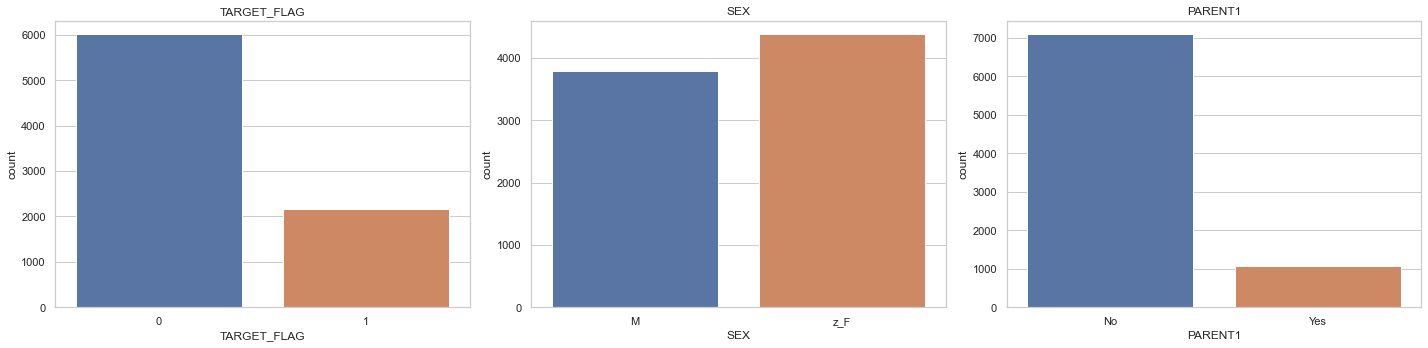

In [85]:
fig,axx = plt.subplots(1,3,figsize = (20,5))
axx[0].set_title('TARGET_FLAG')
sns.countplot(x='TARGET_FLAG', data=train, ax=axx[0])
axx[1].set_title('SEX')
sns.countplot(x='SEX', data=train, ax=axx[1])
axx[2].set_title('PARENT1')
sns.countplot(x='PARENT1', data=train, ax=axx[2])
plt.tight_layout()

It is clear that our target variable TARGET_FLAG is **imbalanced**.

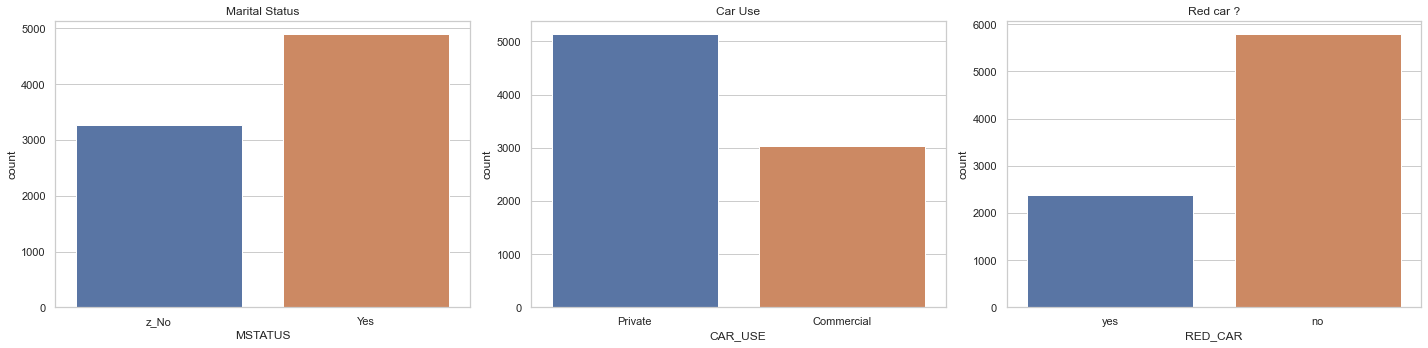

In [86]:
fig,axx = plt.subplots(1,3,figsize = (20,5))
axx[0].set_title('Marital Status')
sns.countplot(x='MSTATUS', data=train, ax=axx[0])
axx[1].set_title('Car Use')
sns.countplot(x='CAR_USE', data=train, ax=axx[1])
axx[2].set_title('Red car ?')
sns.countplot(x='RED_CAR', data=train, ax=axx[2])
plt.tight_layout()

<AxesSubplot:title={'center':'Urbanicity'}, xlabel='URBANICITY', ylabel='count'>

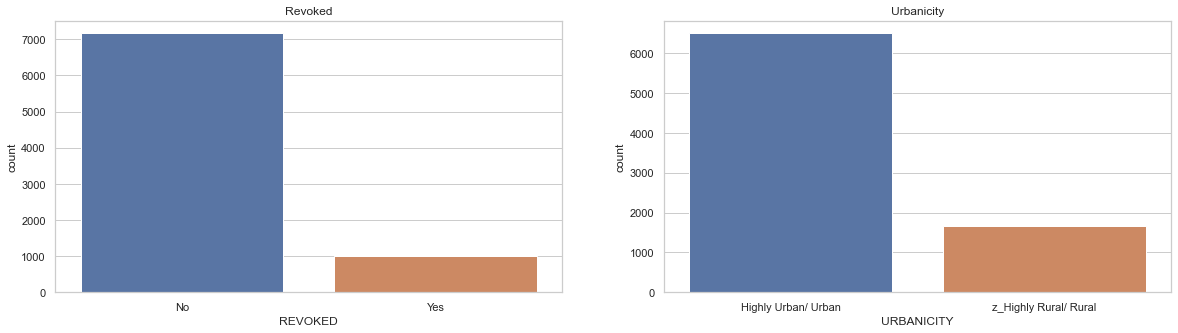

In [87]:
fig,axx = plt.subplots(1,2,figsize = (20,5))
axx[0].set_title('Revoked')
sns.countplot(x='REVOKED', data=train, ax=axx[0])
axx[1].set_title('Urbanicity')
sns.countplot(x='URBANICITY', data=train, ax=axx[1])


As there is only two name (URBAN and RURAL) in Urbanicity columns, we rename it just Urban and Rural.

In [88]:
train.URBANICITY.replace({"Highly Urban/ Urban":"Urban","z_Highly Rural/ Rural":"Rural"},inplace=True)
train.URBANICITY.value_counts()

Urban    6492
Rural    1669
Name: URBANICITY, dtype: int64

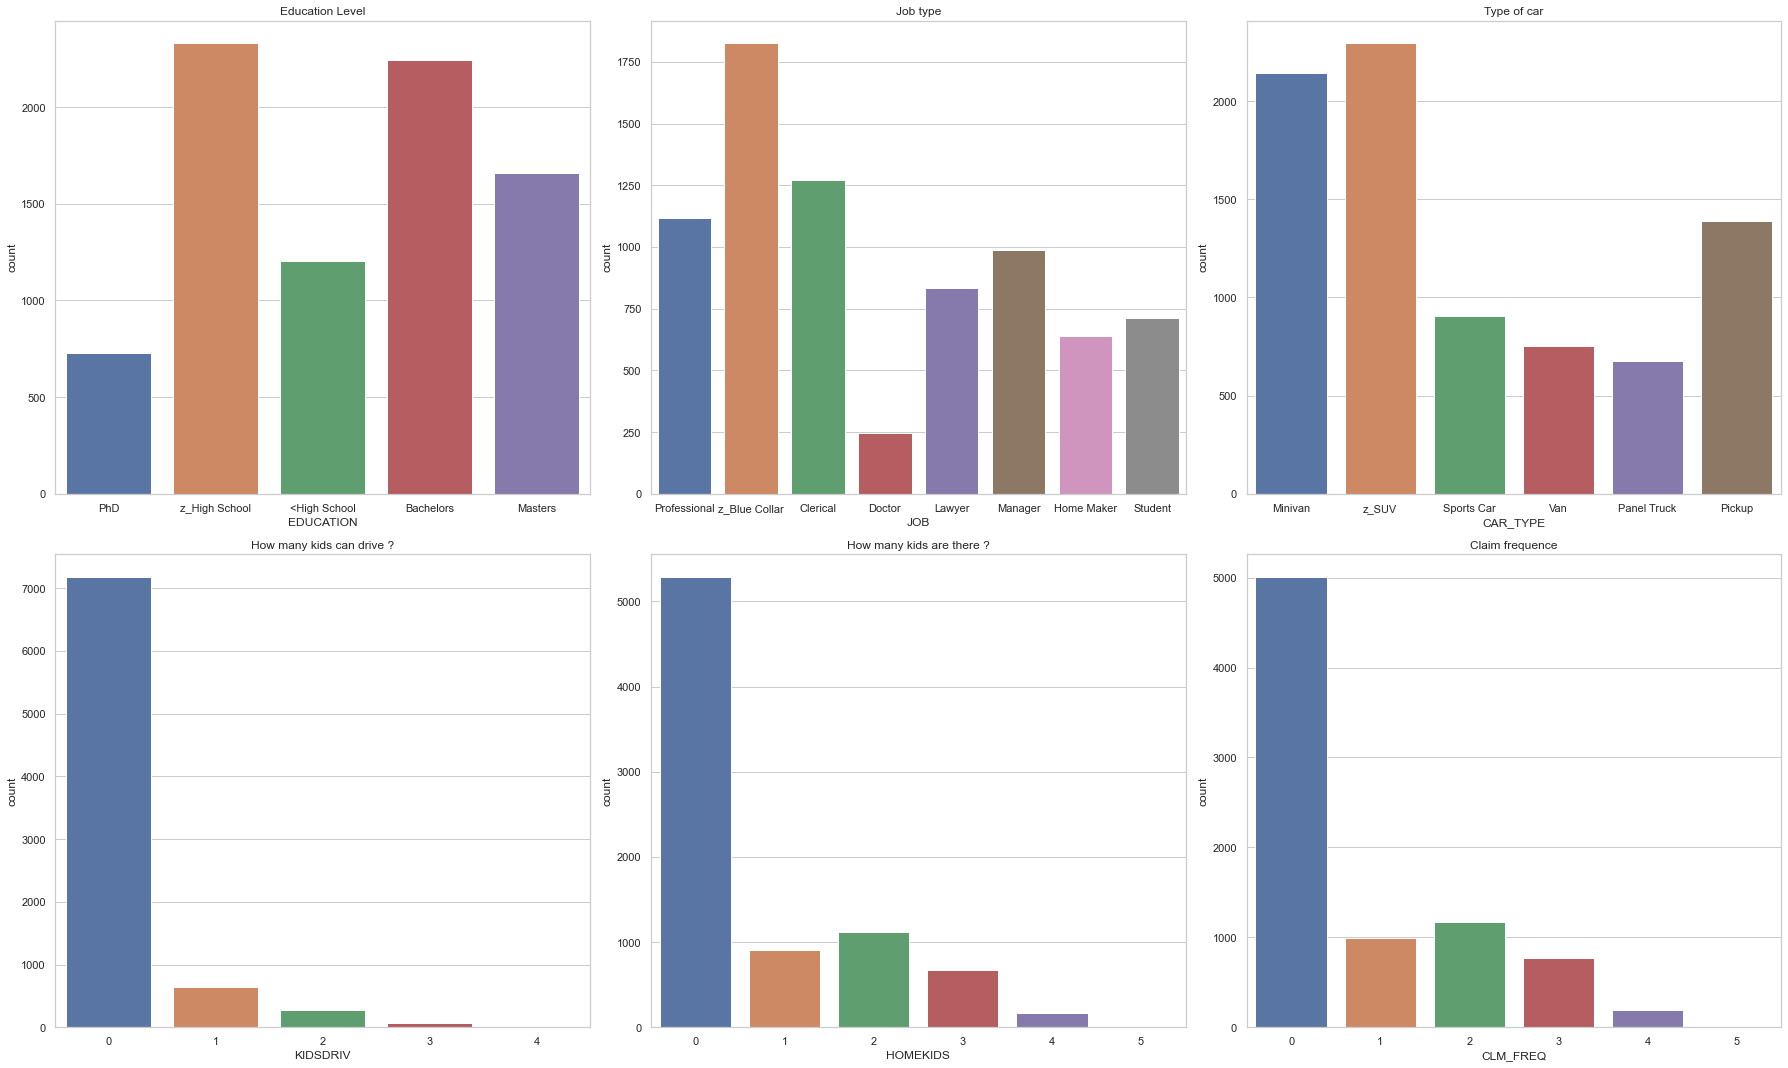

In [89]:

fig,axx = plt.subplots(2,3,figsize = (25,15))
axx[0,0].set_title('Education Level')
sns.countplot(x='EDUCATION', data=train, ax=axx[0,0])
axx[0,1].set_title('Job type')
sns.countplot(x='JOB', data=train, ax=axx[0,1])
axx[0,2].set_title('Type of car')
sns.countplot(x='CAR_TYPE', data=train, ax=axx[0,2])

axx[1,0].set_title('How many kids can drive ?')
sns.countplot(x='KIDSDRIV', data=train, ax=axx[1,0])
axx[1,1].set_title('How many kids are there ?')
sns.countplot(x='HOMEKIDS', data=train, ax=axx[1,1])
axx[1,2].set_title('Claim frequence')
sns.countplot(x='CLM_FREQ', data=train, ax=axx[1,2])

plt.tight_layout()


* For the variables like KIDSDRIV, HOMEKIDS, CLM_FREQ, dominant value is 0. Therefore, We can transform these three variables to binaray variables. 

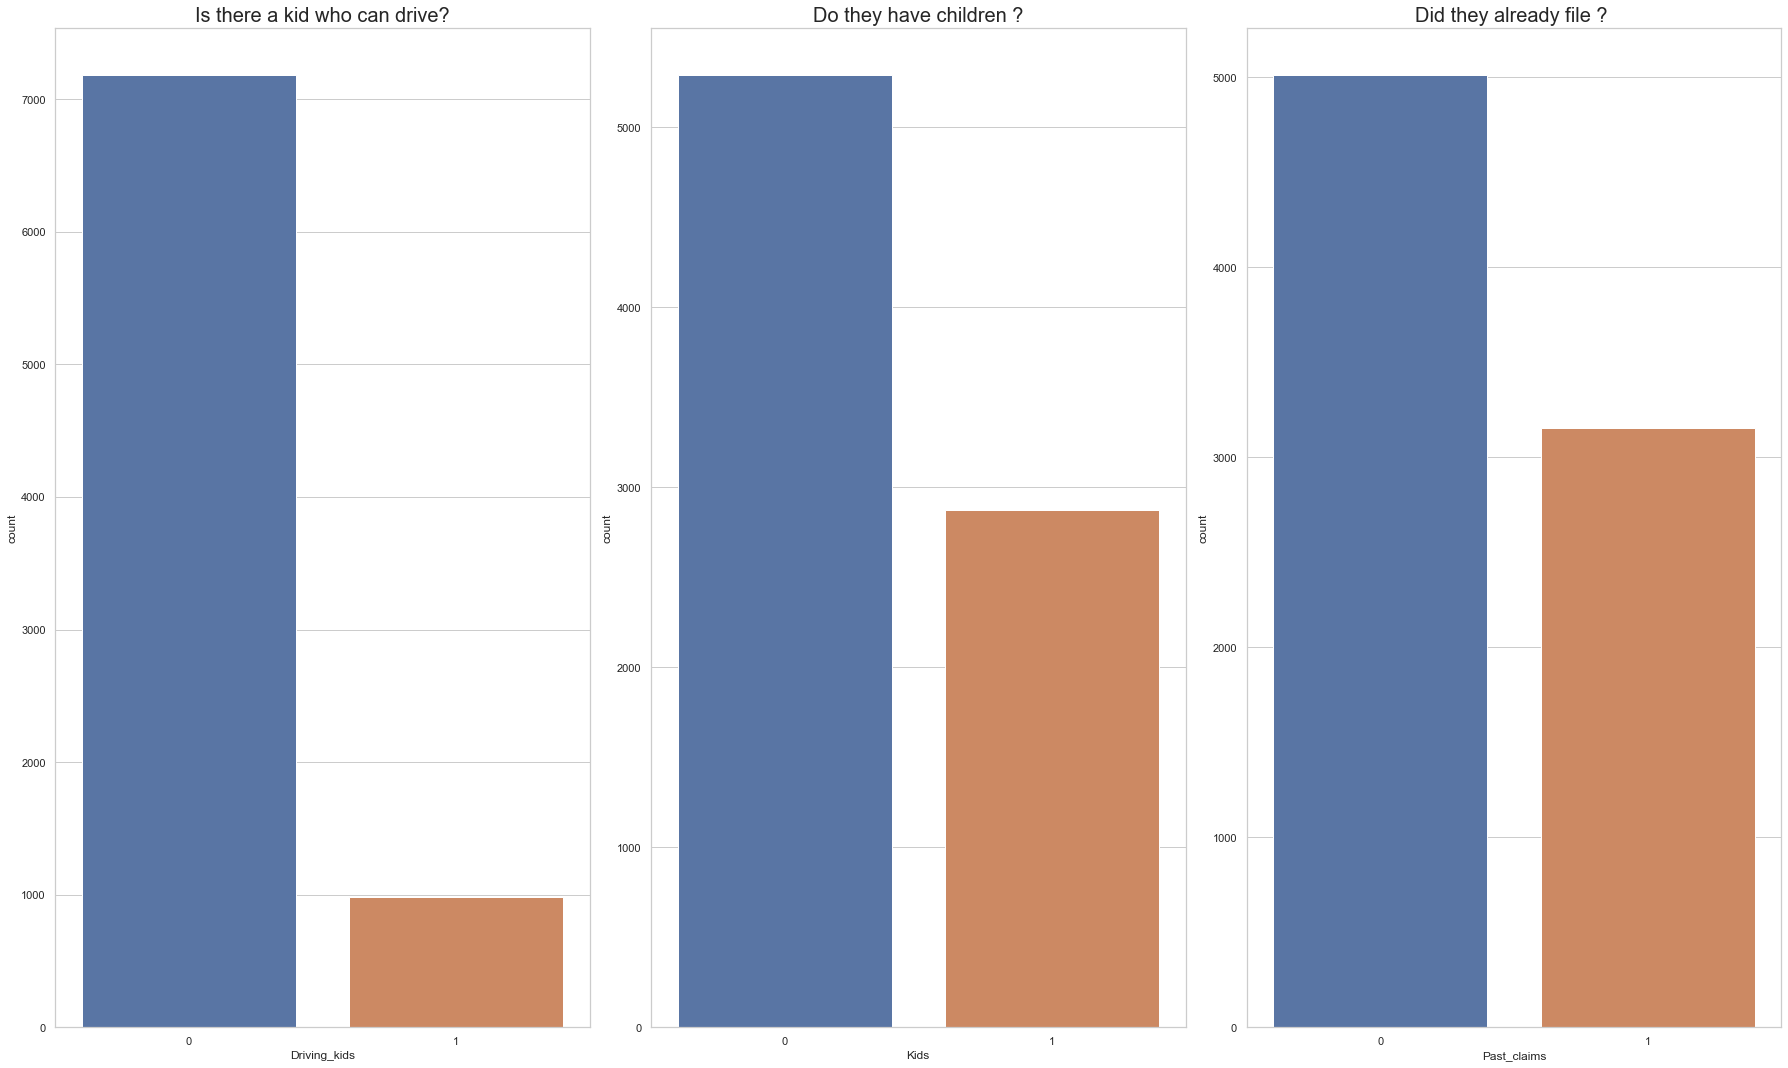

In [90]:
train['Driving_kids']=train['KIDSDRIV'].replace([1,2,3,4],1)
train['Kids']=train['HOMEKIDS'].replace([1,2,3,4,5],1)
train['Past_claims']=train['CLM_FREQ'].replace([1,2,3,4,5],1)
fig,axx = plt.subplots(1,3,figsize = (25,15))
axx[0].set_title('Is there a kid who can drive?',fontsize= 20)
sns.countplot(x='Driving_kids', data=train, ax=axx[0])
axx[1].set_title('Do they have children ?',fontsize= 20)
sns.countplot(x='Kids', data=train, ax=axx[1])
axx[2].set_title('Did they already file ? ',fontsize= 20)
sns.countplot(x='Past_claims', data=train, ax=axx[2])

plt.tight_layout()


Eventhough we changed all of the values bigger than 1 to 1, 0 has still dominant position for three variables.

In [91]:
train.Past_claims

0       1
1       0
2       1
3       0
4       1
       ..
8156    0
8157    0
8158    0
8159    0
8160    0
Name: Past_claims, Length: 8161, dtype: int64

<AxesSubplot:xlabel='MVR_PTS', ylabel='Count'>

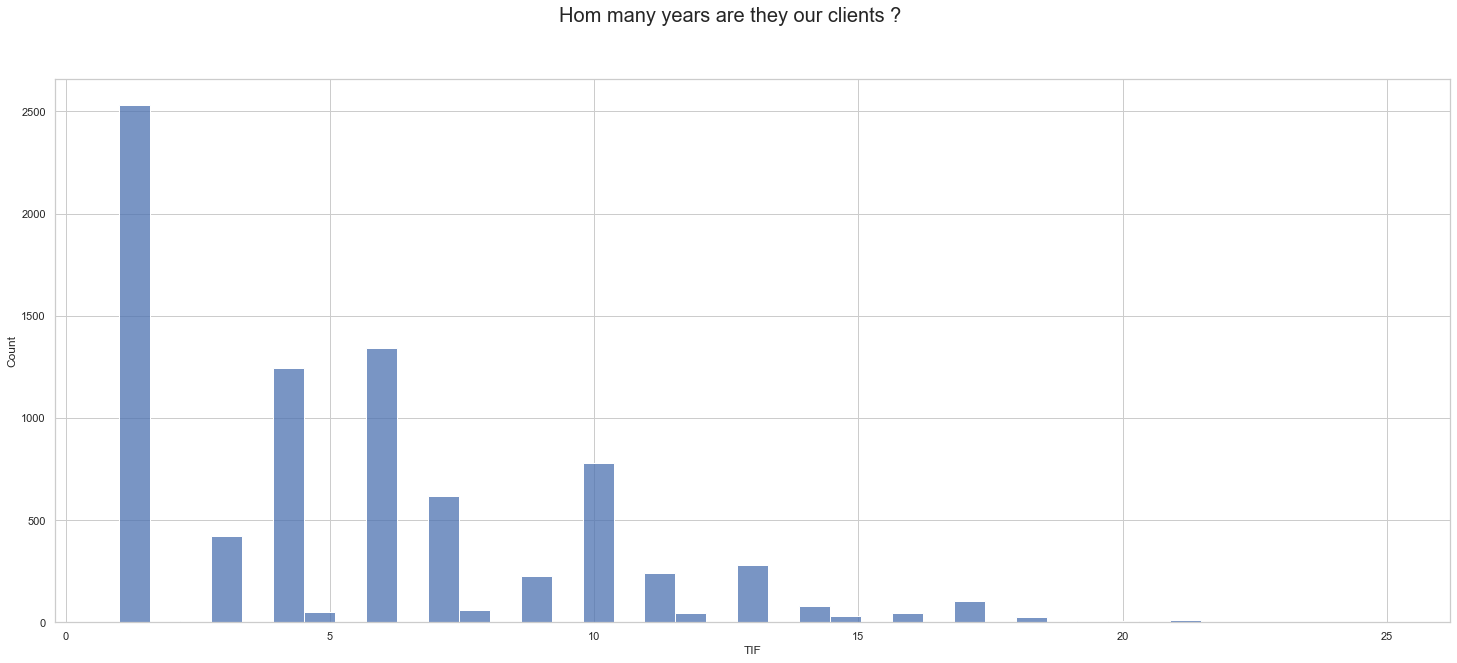

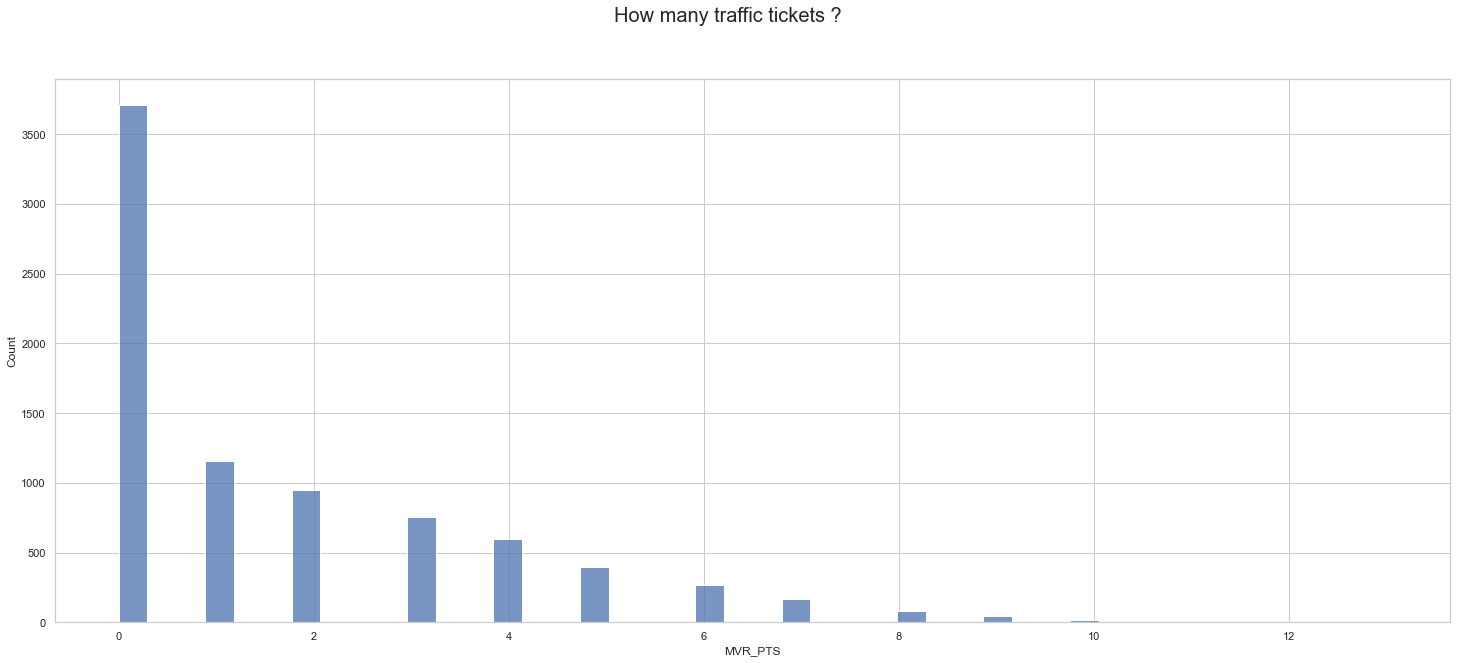

In [92]:

plt.figure(figsize=[25, 10])
plt.suptitle('Hom many years are they our clients ?',fontsize= 20)
sns.histplot(x='TIF', data=train)

plt.figure(figsize=[25, 10])
plt.suptitle('How many traffic tickets ? ',fontsize= 20)
sns.histplot(x='MVR_PTS', data=train)

 it would be reasonable to consider all records with more than 10 MVR_PTS as having 10, since there are so few.

In [93]:
train['MVR_PTS'].replace([11,13],10,inplace=True)

In [94]:
train['MVR_PTS'].value_counts()

0     3712
1     1157
2      948
3      758
4      599
5      399
6      266
7      167
8       84
9       45
10      26
Name: MVR_PTS, dtype: int64

<AxesSubplot:xlabel='MVR_PTS', ylabel='Count'>

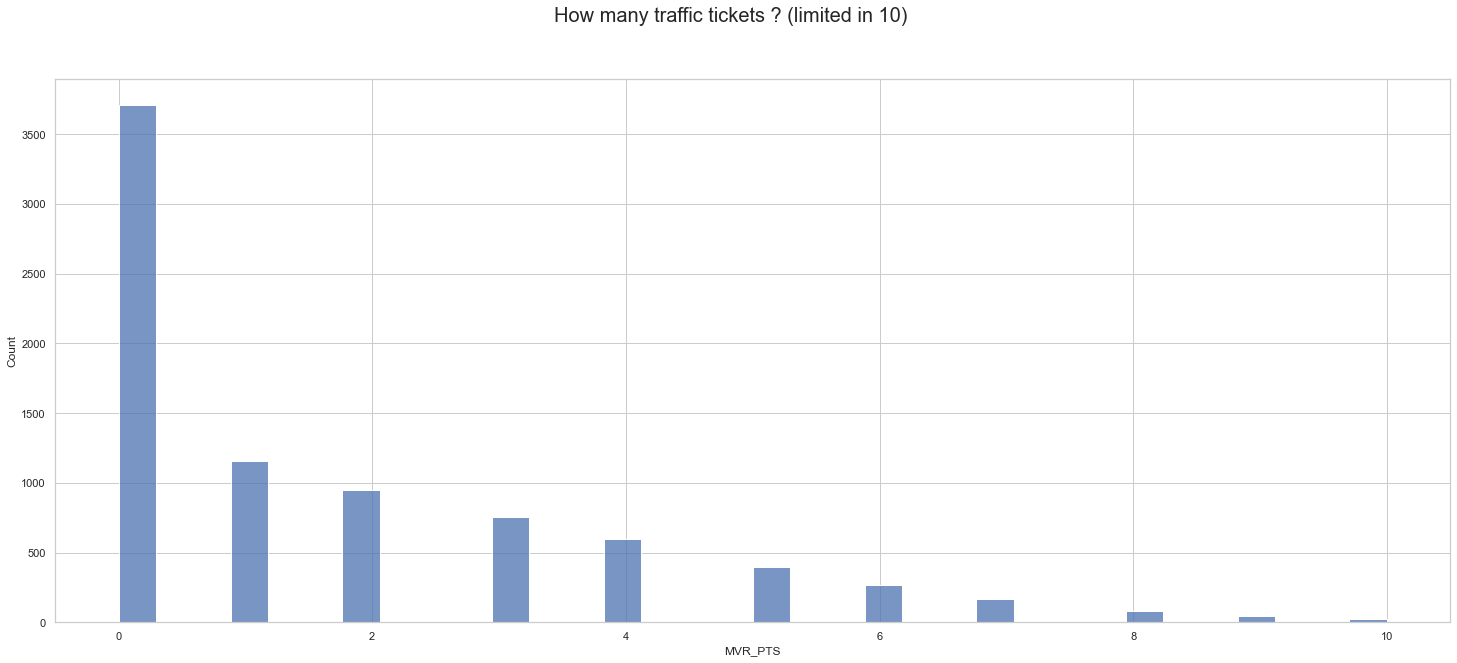

In [95]:
plt.figure(figsize=[25, 10])
plt.suptitle('How many traffic tickets ? (limited in 10)',fontsize= 20)
sns.histplot(x='MVR_PTS', data=train)

# Continuous variable distribution with 50+ unique values

<AxesSubplot:xlabel='OLDCLAIM', ylabel='Count'>

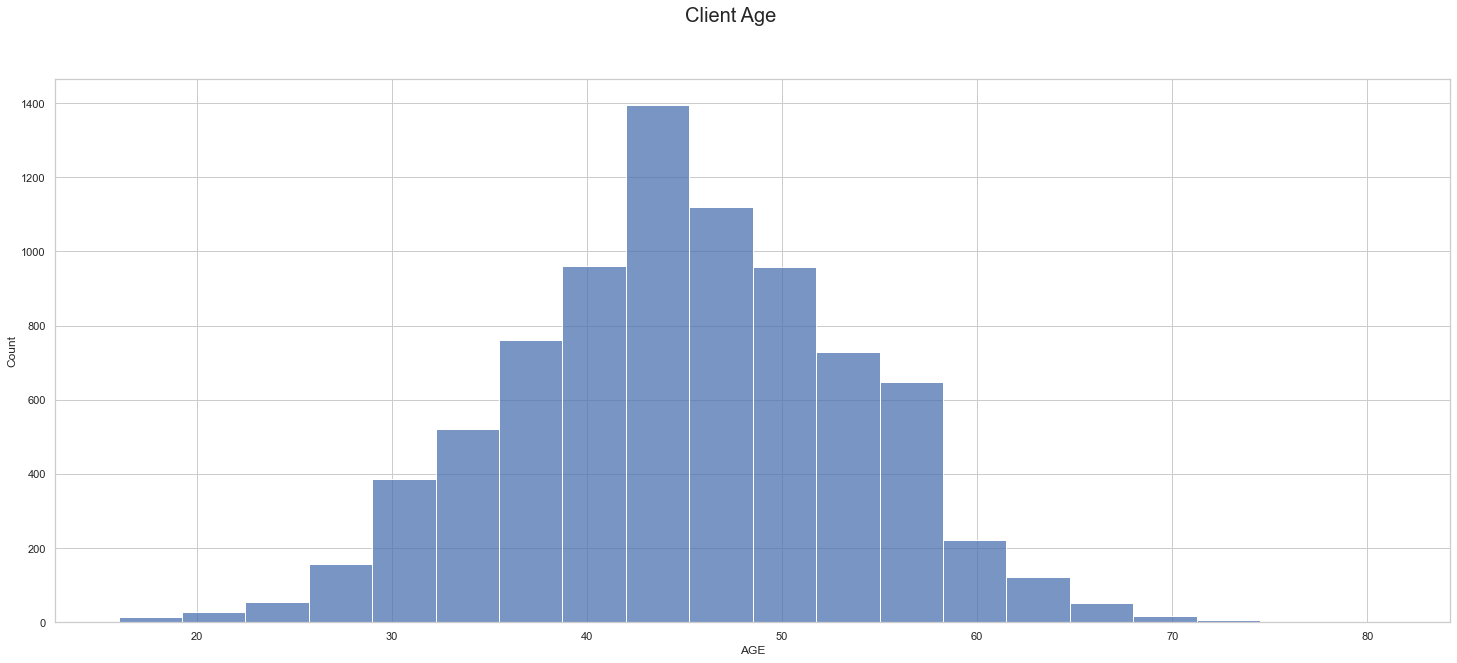

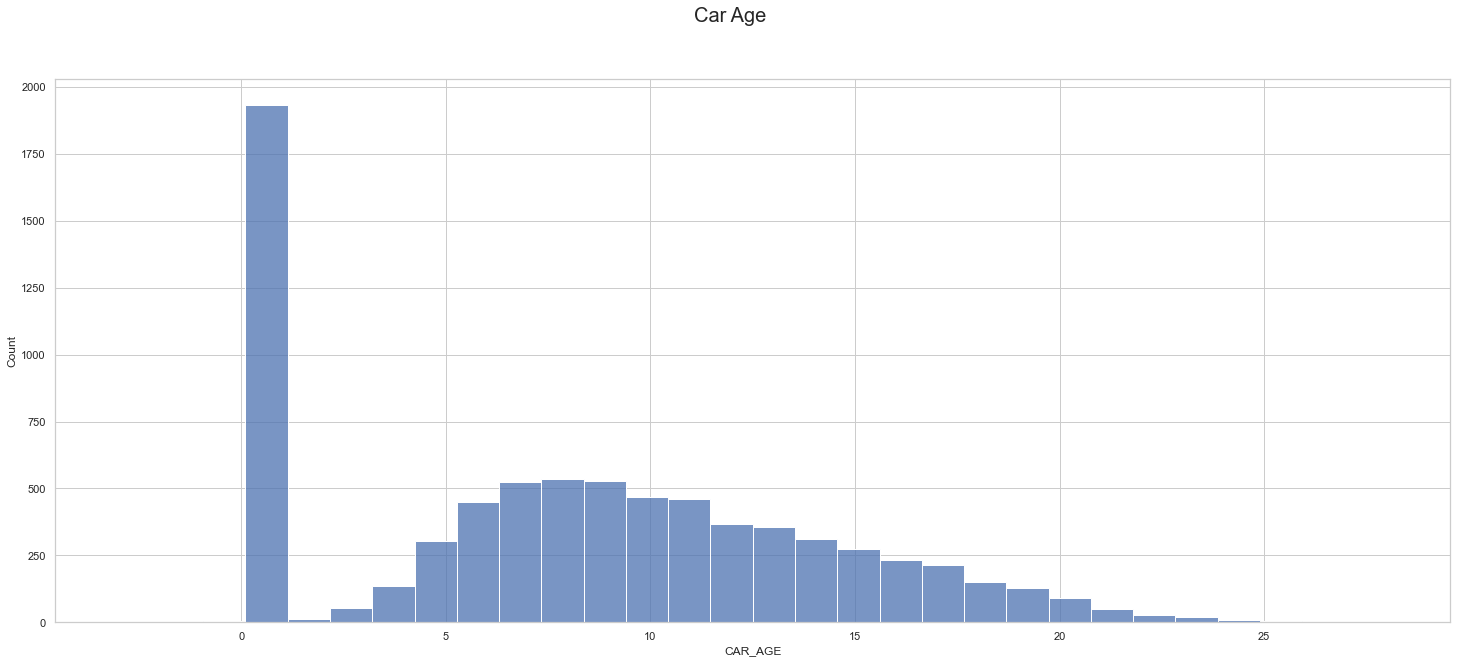

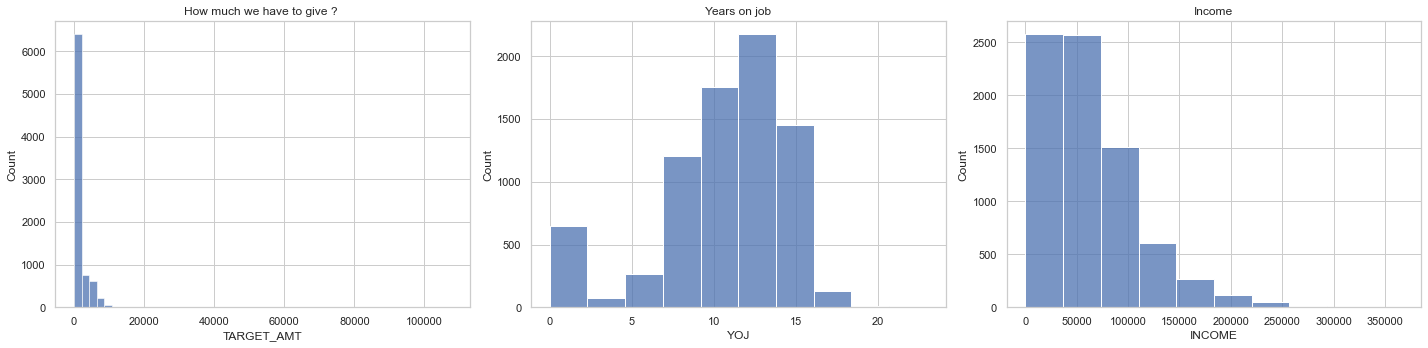

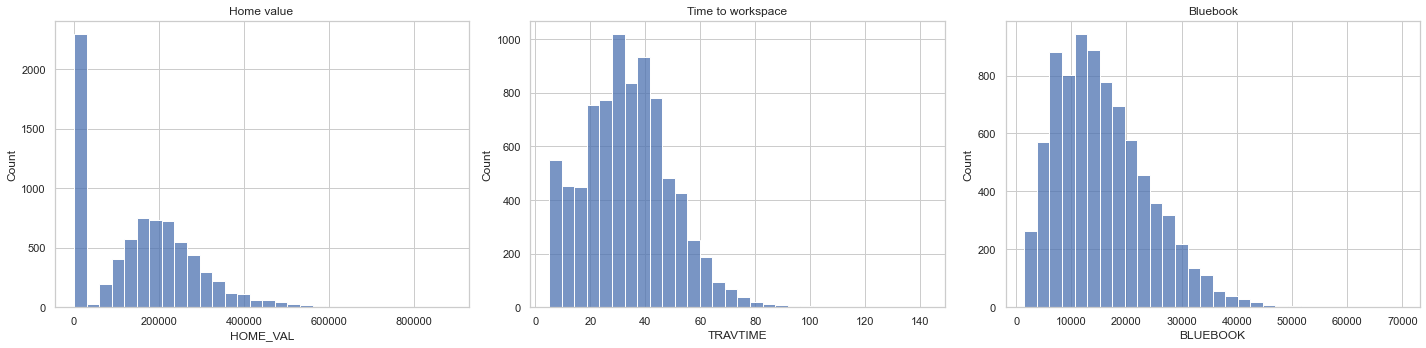

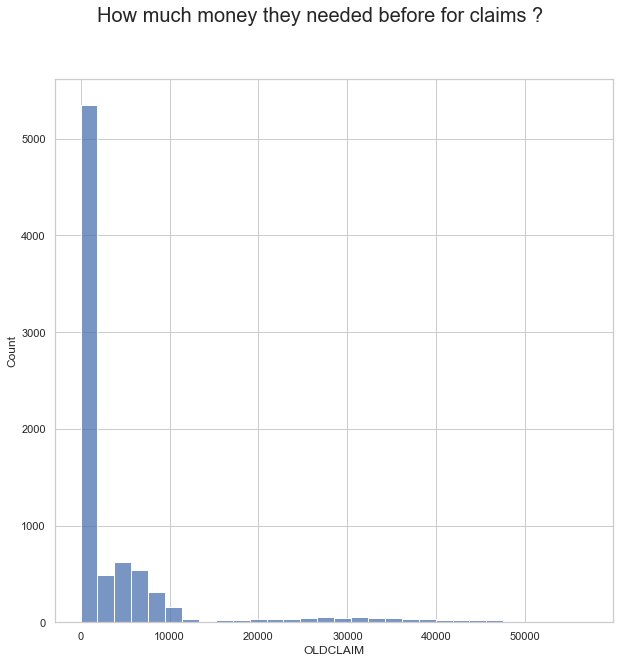

In [96]:


plt.figure(figsize=[25, 10])
plt.suptitle('Client Age',fontsize= 20)
sns.histplot(x='AGE', data=train,bins = 20)
plt.figure(figsize=[25, 10])
plt.suptitle('Car Age',fontsize= 20)
sns.histplot(x='CAR_AGE', data=train, bins =30)

fig,axx = plt.subplots(1,3,figsize = (20,5))
axx[0].set_title('How much we have to give ? ')
sns.histplot(x='TARGET_AMT', data=train, ax=axx[0],bins=50)
axx[1].set_title('Years on job')
sns.histplot(x='YOJ', data=train, ax=axx[1],bins=10)
axx[2].set_title('Income')
sns.histplot(x='INCOME', data=train, ax=axx[2],bins=10)
plt.tight_layout()

fig,axx = plt.subplots(1,3,figsize = (20,5))
axx[0].set_title('Home value ')
sns.histplot(x='HOME_VAL', data=train, ax=axx[0],bins=30)
axx[1].set_title('Time to workspace')
sns.histplot(x='TRAVTIME', data=train, ax=axx[1],bins=30)
axx[2].set_title('Bluebook')
sns.histplot(x='BLUEBOOK', data=train, ax=axx[2],bins=30)
plt.tight_layout()

plt.figure(figsize=[10, 10])
plt.suptitle('How much money they needed before for claims ?  ',fontsize= 20)
sns.histplot(x='OLDCLAIM', data=train,bins=30)


* For client's age, We find that it is roughly normally distributed. Min value is almost 16, and max value is around 80. 
* For car's age, We find one record with CAR_AGE = -3, which I assume is a simple error. And we find there are many cars that are one year old, then once you start looking at cars that are 3+ years old the distribution becomes normal-ish (a bit right-skewed in terms of there being a few cars that are very old).

* For home value, it would be interesting to change this variables to binary varibles like "Is he a homeowner ?" because here, the majority class is 0 (people who are not homeowner). As our initial assumption was that home owner is safer client, if we change this to binary variable, we can obtain some meaningful result in termes of Target varible.

* Many records are for individuals who have only been insured with the company for 1 year, though there are also a fair number of individuals who have been insured with us for quite awhile.

* For years on the job, there are relatively few individuals that have been on the job for just a few years (1-4). Most individuals are either new (on the job for 0 years) or have been on the job for awhile (5+ years).

* We can see also some correlation between amount of money paid for old claims and Target_AMT. It is because the majority value is zero. More than 6000 values of Target_AMT and almost 5000 values of old claims are zero. That is the reason why we saw imbalanced classes for TARGET_FLAG. To verify the distribution of these two variables which is bigger than 0 value, we will visualize the values between 0 and 10000 $. Why 10,000 $ ? as we see in the above graphes, after 10,000$, the count of amount of money is dropped.

* Most of variables are right-skewed. This distribution can disturb the use of machine learning algorithm like KNN and sevral regression model because these models suppose that their input has normall distribution. To solve this problem, we need to apply **log-transformation.**

<AxesSubplot:xlabel='Homeowner', ylabel='count'>

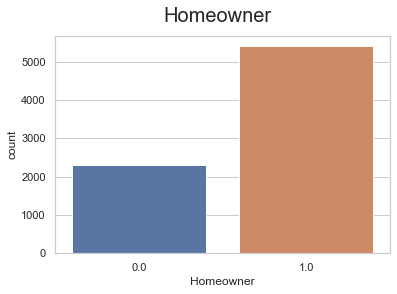

In [97]:
train['Homeowner']=train.HOME_VAL
train.loc[train.Homeowner>0,'Homeowner']=1
plt.suptitle('Homeowner',fontsize= 20)
sns.countplot(x='Homeowner', data=train)

<AxesSubplot:xlabel='OLDCLAIM', ylabel='Count'>

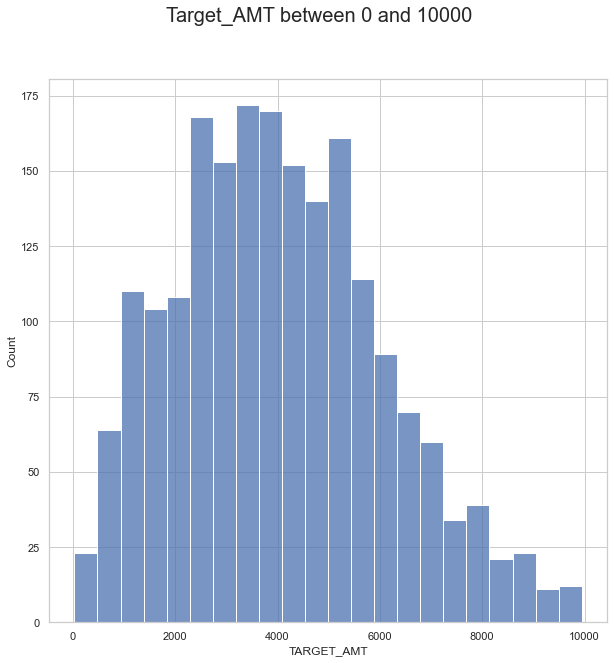

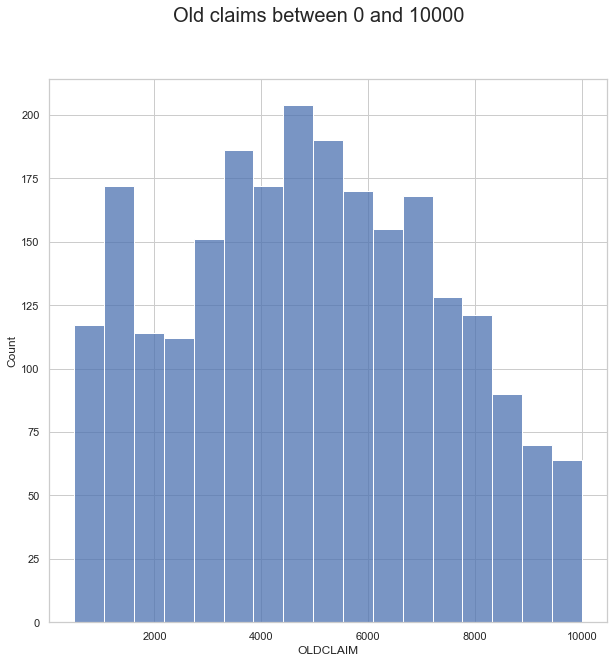

In [98]:
target_amt_smaller=train[(train.TARGET_AMT<10000) & (train.TARGET_AMT>0)]
plt.figure(figsize=[10, 10])
plt.suptitle('Target_AMT between 0 and 10000',fontsize= 20)
sns.histplot(x='TARGET_AMT', data=target_amt_smaller)


old_claim_smaller=train[(train.OLDCLAIM<10000) & (train.OLDCLAIM>0)]
plt.figure(figsize=[10, 10])
plt.suptitle('Old claims between 0 and 10000',fontsize= 20)
sns.histplot(x='OLDCLAIM', data=old_claim_smaller)


Between 0 and 10,000$, two variables are quite normally distributed

# 3. Preprocessing phases

# **Variable conversion**
In our dataset, there are sevral categorical variables like SEX, EDUCATION, etc... But the statistical/Machine learning algorithm cannot process categorical value, but just numerical value. For that, we need to convert our categorical variable to numerical value. There are two types of conversion techniques. 

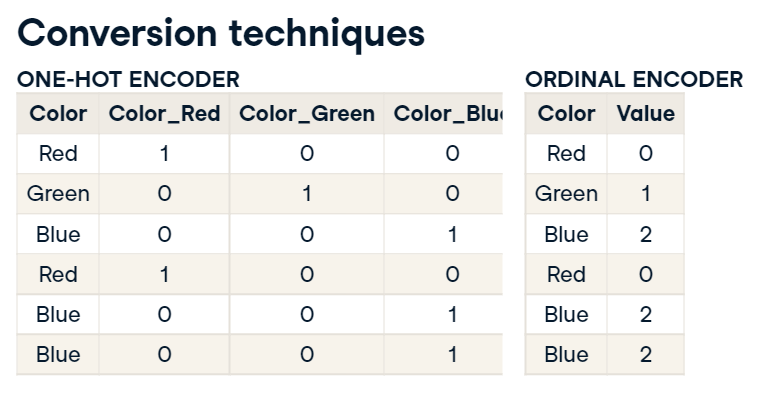

We will apply one hot encoding for binary variable like SEX, MSTATUS.
For other discret variable, while one-hot encoder is apter, we will use ordinal encoder for simplicity. We can do all of it by LabelEncoder method of sklearn.preprocessing

# **One hot encoding for Binary variable** (SEX,PARENT1,MSTATUS,CAR_USE,RED_CAR,REVOKED,URBANICITY)

In [99]:
# Create OneHot encoder
labels = LabelEncoder()

# Select non-null values of ambience column in users
binary = train[['SEX','MSTATUS','PARENT1','CAR_USE','RED_CAR','REVOKED','URBANICITY']]
train[['SEX','MSTATUS','PARENT1','CAR_USE','RED_CAR','REVOKED','URBANICITY']]=binary.apply(labels.fit_transform)
train.MSTATUS.replace({0:1,1:0},inplace =True)
train.URBANICITY.replace({'Urban':'Rural','Rural':'Urban'},inplace =True)

|  Label encoded variable |      0      |       1       |
|:-----------------------:|:-----------:|:-------------:|
|           SEX           |     Male    |     Female    |
|         MSTATUS         | Not Married |    Married    |
|         PARENT1         | Two Parents | Single Parent |
|         CAR_USE         |  Commercial |    Private    |
|         RED_CAR         | Other color |    Red car    |
|         REVOKED         |      No     |      Yes      |
|        URBANICITY       |    Rural    |     Urban     |
|       Driving Kids      |      No     |      Yes      |
|           Kids          |      No     |      Yes      |
|       Past Claims       |      No     |      Yes      |
|        Homeowner        |      No     |      Yes      |

# **Ordinal encoding for other discret variable**(EDUCATION,JOB,CAR_TYPE,KIDSDRIV,HOMEKIDS,CLM_FREQ,HOMEKIDS)

In [100]:
ordinary = train[['EDUCATION','JOB','CAR_TYPE','KIDSDRIV','HOMEKIDS','CLM_FREQ','HOMEKIDS']]
train[['EDUCATION','JOB','CAR_TYPE','KIDSDRIV','HOMEKIDS','CLM_FREQ','HOMEKIDS']]=ordinary.apply(labels.fit_transform)
train.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,Driving_kids,Kids,Past_claims,Homeowner
0,1,0,0.0,0,60.0,0,11.0,67349.0,0,0.0,...,4461.0,2,0,3,18.0,1,0,0,1,0.0
1,2,0,0.0,0,43.0,0,11.0,91449.0,0,257252.0,...,0.0,0,0,0,1.0,1,0,0,0,1.0
2,4,0,0.0,0,35.0,1,10.0,16039.0,0,124191.0,...,38690.0,2,0,3,10.0,1,0,1,1,1.0
3,5,0,0.0,0,51.0,0,14.0,NaN,0,306251.0,...,0.0,0,0,0,6.0,1,0,0,0,1.0
4,6,0,0.0,0,50.0,0,NaN,114986.0,0,243925.0,...,19217.0,2,1,3,17.0,1,0,0,1,1.0


In [101]:
train.head(30)

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,Driving_kids,Kids,Past_claims,Homeowner
0,1,0,0.00000,0,60.0,0,11.0,67349.0,0,0.0,...,4461.0,2,0,3,18.0,1,0,0,1,0.0
1,2,0,0.00000,0,43.0,0,11.0,91449.0,0,257252.0,...,0.0,0,0,0,1.0,1,0,0,0,1.0
2,4,0,0.00000,0,35.0,1,10.0,16039.0,0,124191.0,...,38690.0,2,0,3,10.0,1,0,1,1,1.0
3,5,0,0.00000,0,51.0,0,14.0,NaN,0,306251.0,...,0.0,0,0,0,6.0,1,0,0,0,1.0
4,6,0,0.00000,0,50.0,0,NaN,114986.0,0,243925.0,...,19217.0,2,1,3,17.0,1,0,0,1,1.0
5,7,1,2946.00000,0,34.0,1,12.0,125301.0,1,0.0,...,0.0,0,0,0,7.0,1,0,1,0,0.0
6,8,0,0.00000,0,54.0,0,NaN,18755.0,0,NaN,...,0.0,0,0,0,1.0,1,0,0,0,NaN
7,11,1,4021.00000,1,37.0,2,NaN,107961.0,0,333680.0,...,2374.0,1,1,10,7.0,1,1,1,1,1.0
8,12,1,2501.00000,0,34.0,0,10.0,62978.0,0,0.0,...,0.0,0,0,0,1.0,1,0,0,0,0.0
9,13,0,0.00000,0,50.0,0,7.0,106952.0,0,0.0,...,0.0,0,0,1,17.0,0,0,0,0,0.0


# **Missing value processing**

In [102]:
train.isnull().sum()

INDEX             0
TARGET_FLAG       0
TARGET_AMT        0
KIDSDRIV          0
AGE               6
HOMEKIDS          0
YOJ             454
INCOME          445
PARENT1           0
HOME_VAL        464
MSTATUS           0
SEX               0
EDUCATION         0
JOB               0
TRAVTIME          0
CAR_USE           0
BLUEBOOK          0
TIF               0
CAR_TYPE          0
RED_CAR           0
OLDCLAIM          0
CLM_FREQ          0
REVOKED           0
MVR_PTS           0
CAR_AGE         510
URBANICITY        0
Driving_kids      0
Kids              0
Past_claims       0
Homeowner       464
dtype: int64

<AxesSubplot:>

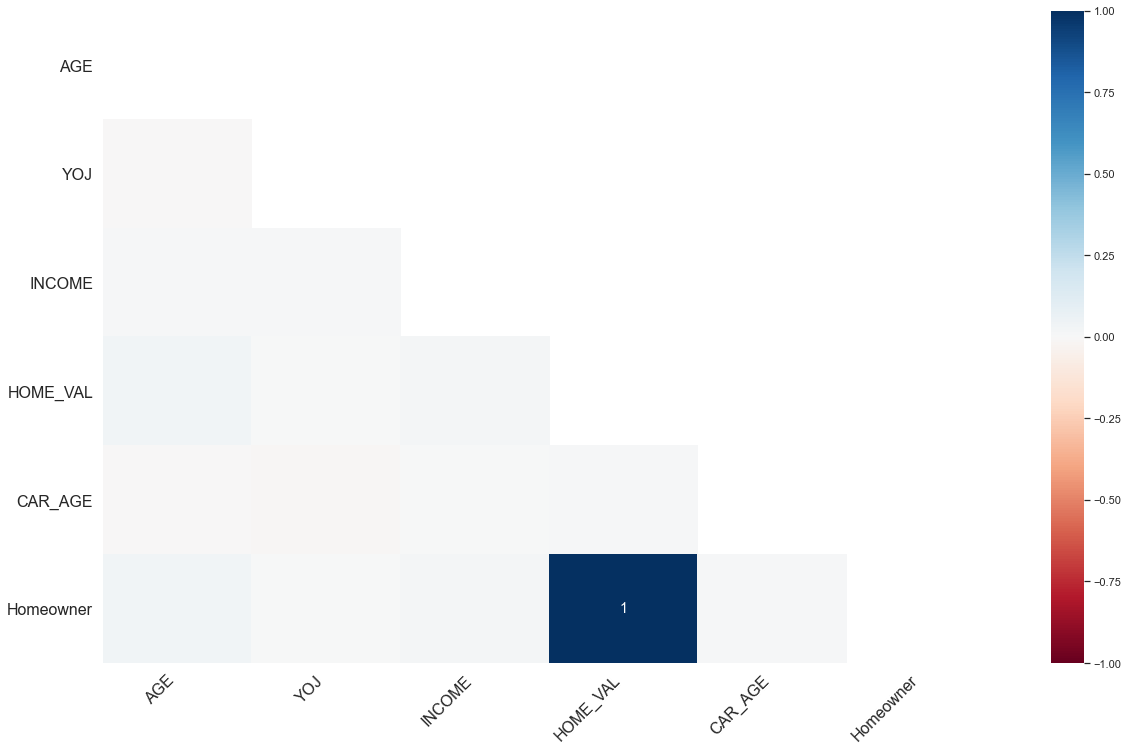

In [103]:
msno.heatmap(train)

Above heatmap show us the correlation of each missing value. This is between 0 and (-1,1).If we have coefficient close to 0, it means there is no correlation between variables.If it has a value close to 1 or -1, it means there is strong positive(1) or negative(-1) correlation. Apparently, there is no correlation between each missing value. 
Our missing value's characteristic is **"Missing at random(MCAR)"**

In [104]:
missing = train.isna().sum()
missing_percent=missing*100/len(train)
missing_values = missing_percent.to_frame()
missing_values.columns = ['Missing Value Percent']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

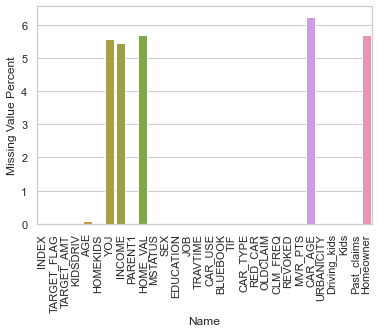

In [105]:

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'Missing Value Percent', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

There are 400-500 missing values for AGE,YOJ,INCOME,HOME_VAL,JOB,CAR_AGE. But their percentage is not so high (just 5-6%). So it is better to fill it than deleting rows/columns as missing value's amount is not signficant.

# **Imputation**

What is the imputation ? imputation is the process of replacing missing data with substituted values. Of course, there are sevral method having different performance.

1. Deletion of lows of columns which have missing value : This is the simplest way to process missing value. If the quantity of missing value is too big to be replaced (problem of information distortion) and it is not so significant variable in termes of target variable. However, here missing value is only 5-6 % of each variable. And we cannot sure that the correlation bewteen target and other variable. So we will not consider this option for this dataset.

2. We can replace the missing value by one constant value like (each variable's)mean value, median value, most frequent (Mode) value, Min,Max, 0 etc, etc. There are clear advantages and inconvenients :
-**Advantages:**
Easy to implement.
Fast way of obtaining complete datasets.

-**Limitations:**
Distortion of the original variable distribution.
Distortion of the original variance.

3. Finally, we can use machine learning method like k-nearest neighbors algorithm (KNN), Multiple Imputation with Chained Equations (MICE) or other regression method. KNN method is more robust than simple constant value imputation (mean,median). However it is computationally expensive. For MICE method, it shows slightly better performance in sevral documents.

Here, we will use MICE method for imputation because it showed better performance in sevral documents. 

# **MICE Method**

What is Multiple Imputation with Chained Equations (MICE) method ? 

In [106]:
train_copy=train.copy(deep = True)
mice_imputer = IterativeImputer()
train_copy.iloc[:, :] = mice_imputer.fit_transform(train)

train_copy.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       INDEX  TARGET_FLAG  TARGET_AMT  KIDSDRIV    AGE  HOMEKIDS    YOJ  \
0     False        False       False     False  False     False  False   
1     False        False       False     False  False     False  False   
2     False        False       False     False  False     False  False   
3     False        False       False     False  False     False  False   
4     False        False       False     False  False     False  False   
...     ...          ...         ...       ...    ...       ...    ...   
8156  False        False       False     False  False     False  False   
8157  False        False       False     False  False     False  False   
8158  False        False       False     False  False     False  False   
8159  False        False       False     False  False     False  False   
8160  False        False       False     False  False     False  False   

      INCOME  PARENT1  HOME_VAL  ...  OLDCLAIM  C

In [107]:
train_copy.isnull().sum()


INDEX           0
TARGET_FLAG     0
TARGET_AMT      0
KIDSDRIV        0
AGE             0
HOMEKIDS        0
YOJ             0
INCOME          0
PARENT1         0
HOME_VAL        0
MSTATUS         0
SEX             0
EDUCATION       0
JOB             0
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CAR_AGE         0
URBANICITY      0
Driving_kids    0
Kids            0
Past_claims     0
Homeowner       0
dtype: int64

We finally filled all of missing value using MICE method

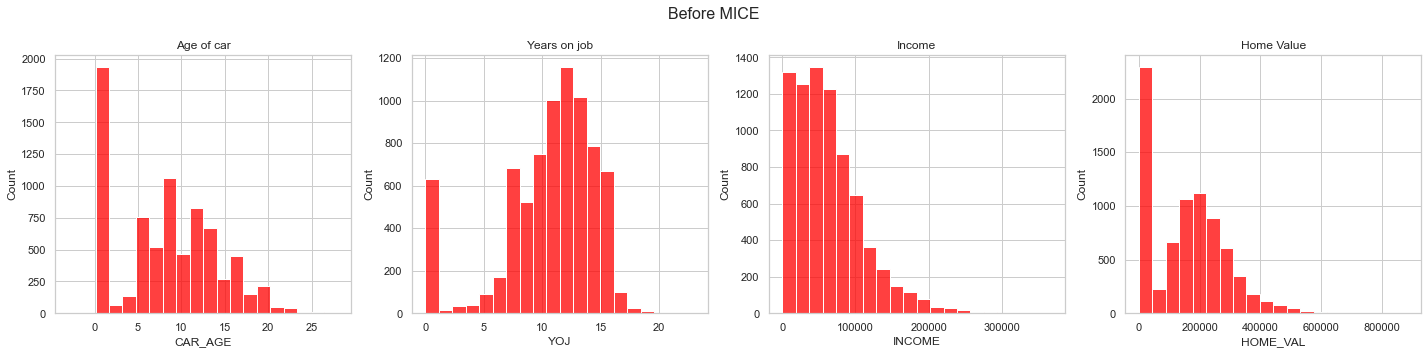

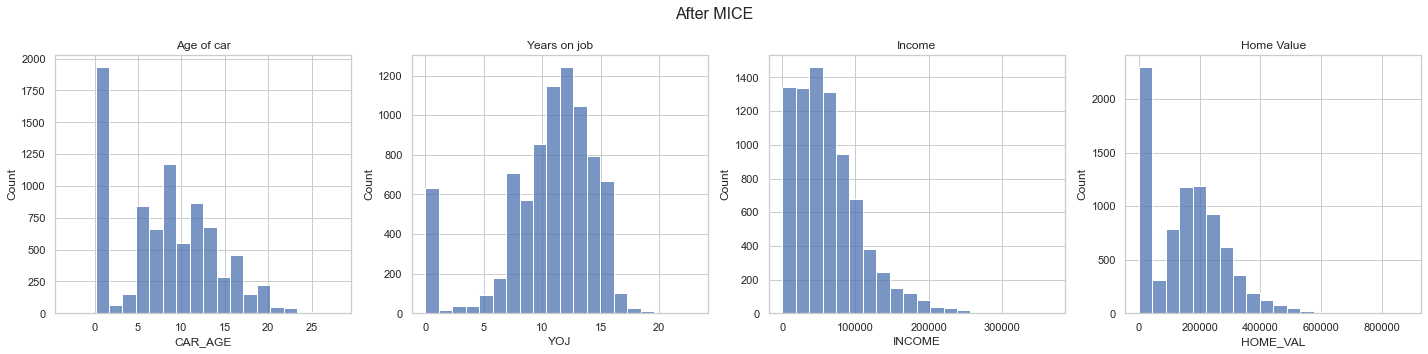

In [108]:


fig,axx = plt.subplots(1,4,figsize = (20,5))
fig.suptitle('Before MICE',fontsize=16)
axx[0].set_title('Age of car')
sns.histplot(x='CAR_AGE', data=train, ax=axx[0],color='red',bins=20)
axx[1].set_title('Years on job')
sns.histplot(x='YOJ', data=train, ax=axx[1],bins=20,color='red')
axx[2].set_title('Income')
sns.histplot(x='INCOME', data=train, ax=axx[2],bins=20,color='red')
axx[3].set_title('Home Value')
sns.histplot(x='HOME_VAL', data=train, ax=axx[3],bins=20,color='red')
plt.tight_layout()


fig,axx = plt.subplots(1,4,figsize = (20,5))
axx[0].set_title('Age of car')
sns.histplot(x='CAR_AGE', data=train_copy, ax=axx[0],bins=20)
axx[1].set_title('Years on job')
sns.histplot(x='YOJ', data=train_copy, ax=axx[1],bins=20)
axx[2].set_title('Income')
sns.histplot(x='INCOME', data=train_copy, ax=axx[2],bins=20)
axx[3].set_title('Home Value')
sns.histplot(x='HOME_VAL', data=train_copy, ax=axx[3],bins=20)
fig.suptitle('After MICE',fontsize=16)
plt.tight_layout()

After MICE method, we can verify that there are no big change in termes of distribution. (I didn't visualize before/after AGE variable because there were only 6 missing value). It means that we can furthur operation like applying classification/regression model without worry about imputation bias.

In [109]:
train=round(train_copy)

# 4. Correlations

In this chapter, we will verify the correlations between variables.

# 4-1.Correlation of predictor variables with TARGET_FLAG

# 4-1-1.Correlation of binary variables with TARGET_FLAG

In [110]:
element_columns = ["SEX", "MSTATUS", "Driving_kids", "Kids", "Past_claims", "CAR_USE", "REVOKED", "RED_CAR", "PARENT1","URBANICITY","Homeowner"]
temp_dict = {}
values=[]
for col in element_columns :
    temp_dict[col]=train.groupby(col)['TARGET_FLAG'].mean().multiply(100)
values.append(temp_dict)
viz = [values[0][k] for k in element_columns]

In [111]:
viz

[SEX
 0.0    25.382990
 1.0    27.245714
 Name: TARGET_FLAG, dtype: float64,
 MSTATUS
 0.0    33.670034
 1.0    21.516142
 Name: TARGET_FLAG, dtype: float64,
 Driving_kids
 0.0    24.693593
 1.0    38.735984
 Name: TARGET_FLAG, dtype: float64,
 Kids
 0.0    22.178106
 1.0    34.122563
 Name: TARGET_FLAG, dtype: float64,
 Past_claims
 0.0    17.92773
 1.0    39.81599
 Name: TARGET_FLAG, dtype: float64,
 CAR_USE
 0.0    34.565863
 1.0    21.551052
 Name: TARGET_FLAG, dtype: float64,
 REVOKED
 0.0    23.879346
 1.0    44.300000
 Name: TARGET_FLAG, dtype: float64,
 RED_CAR
 0.0    26.577901
 1.0    25.904121
 Name: TARGET_FLAG, dtype: float64,
 PARENT1
 0.0    23.673066
 1.0    44.196843
 Name: TARGET_FLAG, dtype: float64,
 URBANICITY
 0.0     6.890354
 1.0    31.392483
 Name: TARGET_FLAG, dtype: float64,
 Homeowner
 0.0    37.088388
 1.0    22.159576
 Name: TARGET_FLAG, dtype: float64]

In [112]:
fig = go.Figure(data=[
    go.Bar(name='Sex',x=viz[0].index, y=viz[0]),
    go.Bar(name='Marital Status',x=viz[1].index, y=viz[1]),
    go.Bar(name='Is there a driving kids?',x=viz[2].index, y=viz[2]),
    go.Bar(name='Is there a children ? ',x=viz[3].index, y=viz[3]),
    go.Bar(name='Did he/she already file? ',x=viz[4].index, y=viz[4]),
    go.Bar(name='Is it private car ? ',x=viz[5].index, y=viz[5]),
    go.Bar(name='Was he/she revoked ?  ',x=viz[6].index, y=viz[6]),
    go.Bar(name='Does he/she have red car?   ',x=viz[7].index, y=viz[7]),
    go.Bar(name='Single parent?',x=viz[8].index, y=viz[8]),
    go.Bar(name='Claims from urban ? ',x=viz[9].index, y=viz[9]),
    go.Bar(name='Is he/she a homeowner ',x=viz[10].index, y=viz[10]),
])
fig.update_layout(
    title='Relations between Target_flag and binary variables',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Claims probability (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),title_x=0.5)
fig.show()

* We find a less than 1% difference in the proportion of individuals with vs. without red cars who crash their vehicles. There is no meaningful difference of claims probability whether or not one has a red car.

* We also find a very minimal difference between genders, and it is actually females who have a slightly higher claims rate.

* Other than that, we find a lot of the differences we might have predicted. Individuals driving commercial vehicles, unmarried individuals, those whose licenses have been revoked, urban drivers, those who do not own homes, those who have had a claim in the past five years, and those with driving teenagers in their family all have crashes at a higher rate.

* We also find that single parents is associate with higher rate.

* What the opposed result is about the variable "HOMEKIDS". As an intial assumptions, we expected that a person with children would be more responsible, meaning that he file less. However, a person who has the children file more. We can think that it is because this variable is associated with other variables having higher rate. 

# Why higher rate with one having children ? 
Firstly, we will see the relation between "Kids" and "PARENT1"(Single Parent). How are single parents defined? All unmarried people with kids in the home, or some other additional criteria? Let’s check.

In [113]:
train.groupby(['PARENT1','Kids'])['TARGET_FLAG'].mean().multiply(100)

PARENT1  Kids
0.0      0.0     22.178106
         1.0     28.077994
1.0      1.0     44.196843
Name: TARGET_FLAG, dtype: float64

* Looks like single parents are simply defined as any unmarried person with children.
* Having children is not associated with a huge increased claims rate. The higher rate associated with having children appears inflated because this group includes single parents.

# 4-1-2.Correlation of other discret variables with TARGET_FLAG 

# EDUCATION, JOB, CAR_TYPE

In [114]:
element_columns = ['EDUCATION', 'JOB', 'CAR_TYPE']
temp_dict = {}
values=[]
for col in element_columns :
    temp_dict[col]=train.groupby(col)['TARGET_FLAG'].mean().multiply(100)
values.append(temp_dict)
viz = [values[0][k] for k in element_columns]

In [115]:
viz

[EDUCATION
 0.0    32.003325
 1.0    23.327386
 2.0    19.722557
 3.0    17.170330
 4.0    34.034335
 Name: TARGET_FLAG, dtype: float64,
 JOB
 0.0    29.189614
 1.0    11.788618
 2.0    28.081123
 3.0    18.323353
 4.0    13.866397
 5.0    22.112802
 6.0    37.359551
 7.0    34.739726
 8.0    25.855513
 Name: TARGET_FLAG, dtype: float64,
 CAR_TYPE
 0.0    16.270396
 1.0    26.331361
 2.0    31.893449
 3.0    33.517089
 4.0    26.800000
 5.0    29.555362
 Name: TARGET_FLAG, dtype: float64]

In [116]:
edu = ['Bachelors','Masters','<High School', 'PhD','z_High School']
fig = go.Figure(data=[
    go.Bar(name='EDUCATION',x=edu, y=viz[0])
])
fig.update_layout(
    title='Education level',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Claims probability (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),title_x=0.5)
fig.show()

* We find that claims rate is substantially lower among those with at least a Bachelors degree.
* There are even further reductions in claims rate among those with a Masters or Phd

In [117]:
jobb=['Clerical','Doctor', 'Home Maker','Lawyer','Professional','Manager','Student','z_Blue Collar']
fig = go.Figure(data=[
    go.Bar(name='JOB',x=jobb, y=viz[1])
])
fig.update_layout(
    title='Job type',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Claims probability (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),title_x=0.5)
fig.show()

* We find that students and blue collar works appear to have a higher rate than individuals with other types of jobs.

In [118]:
cart = ['Minivan','Panel Truck','Pickup','Sports Car','Van','z_SUV']
fig = go.Figure(data=[
    go.Bar(name='Car type',x=cart, y=viz[2])
])
fig.update_layout(
    title='Car type',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Claims probability (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),title_x=0.5)
fig.show()

* We find that minivan drivers are substantially safer than drivers of other types of cars.
* Before, we verified that there was no significant difference of claims rate whether or not one has a red car. However, according to the uban legend, a person who has a red "sports car" seems drive more actively and dynamically, meaning that it can have a higher rate. Is it true ? 

In [119]:
train.groupby(['RED_CAR','CAR_TYPE'])['TARGET_FLAG'].mean().multiply(100)

RED_CAR  CAR_TYPE
0.0      0.0         15.764331
         1.0         24.041812
         2.0         29.803922
         3.0         33.181300
         4.0         24.928367
         5.0         29.524233
1.0      0.0         16.985377
         1.0         28.020566
         2.0         34.455128
         3.0         43.333333
         4.0         28.428928
         5.0         31.111111
Name: TARGET_FLAG, dtype: float64

* We can answer to that question : Yes, if someone have a red sports car, he will be more associated with high claims rate.

# Add binary class transformation
* For education level, “College_education” or not
* For job type, "Student and blue collar worker" or not
* For car type, it would be interesting to consider between "Minivan or not" and "Red sport car" or not. I think that we can choose "minivan or not" binary class because it seems simpler, and more distinguishable (16% vs 84%) 

**Minivan**

In [120]:
train['Minivan'] = train.CAR_TYPE
train.Minivan.replace([1,2,3,4,5],10,inplace=True)
train.Minivan.replace(0,11,inplace=True)
train.Minivan.replace({11:1,10:0},inplace=True)

In [121]:
train.Minivan

0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
8156    0.0
8157    1.0
8158    0.0
8159    1.0
8160    1.0
Name: Minivan, Length: 8161, dtype: float64

**Jobtype**

In [122]:
train['stu_blu'] = train.JOB
train.stu_blu.replace([6,7],10,inplace=True)
train.stu_blu.replace([0,1,2,3,4,5,8],11,inplace=True)
train.stu_blu.replace({11:0,10:1},inplace=True)
train.stu_blu.value_counts()

0.0    5624
1.0    2537
Name: stu_blu, dtype: int64

**Education level**

In [123]:
train['college'] = train.EDUCATION
train.college.replace(4,10,inplace=True)
train.college.replace([0,1,2,3],11,inplace=True)
train.college.replace({11:1,10:0},inplace=True)
train.college.value_counts()

1.0    5831
0.0    2330
Name: college, dtype: int64

# 4-1-3. Correlations of continuous variable with TARGET_FLAG (AGE,OLDCLAIM, CAR_AGE,MVR_PTS,TIF,YOJ,INCOME,BLUEBOOK,TRAVTIME)

# Correlations matrix
Using this matrix, we can observe that there is a linear(positive or negative) relationship between our target variable and other variables.

<AxesSubplot:>

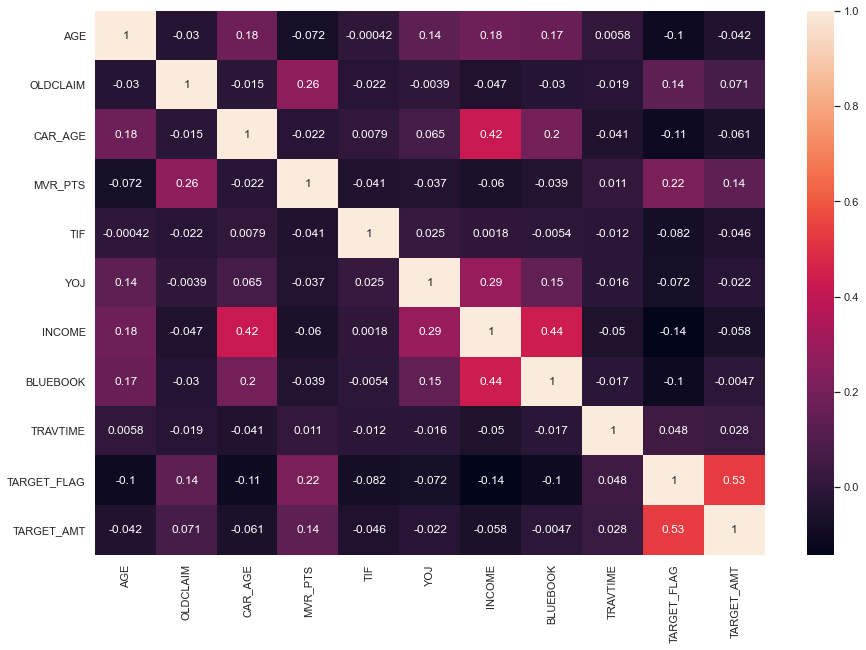

In [124]:
plt.figure(figsize=(15,10))
sns.heatmap(train[['AGE','OLDCLAIM','CAR_AGE','MVR_PTS','TIF','YOJ','INCOME','BLUEBOOK','TRAVTIME','TARGET_FLAG','TARGET_AMT']].corr(),annot=True)


* In termes of our target variable, we cannot observe positive or negatvie relatioship with other variables except for MVR_PTS. Let's see in detail the relation between target variable and other variable. Through this, we can capture the specific interval more related with Target variables.

**AGE**

We will have three intervals like **0-24,25-64,64+**

In [125]:
bins= [0,24,64,100]
labels = ['Young','In-between','Old']
train['AgeGroup'] = pd.cut(train['AGE'], bins=bins, labels=labels, right=False)
viz = train.groupby('AgeGroup')['TARGET_FLAG'].mean().multiply(100)
viz=pd.DataFrame(viz)
viz= viz.reset_index()

In [126]:

fig = go.Figure(data=[
    go.Bar(name='Agegroup',x=viz.AgeGroup, y=viz.TARGET_FLAG)
])
fig.update_layout(
    title='Age',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Claims probability (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),title_x=0.5)
fig.show()

Looks like being under age 25 is definitely associated with higher claims rate, while being older (age 65+) is not.
Let’s add a binary variable Young_age that is true when age < 25.

In [127]:
bins= [0,24,100]
labels = ['Young','Old']
train['AgeGroup'] = pd.cut(train['AGE'], bins=bins, labels=labels, right=False)
print(train.AgeGroup.value_counts())
train.AgeGroup.replace({'Young':1,'Old':0},inplace=True)
print(train.AgeGroup.value_counts())

Old      8110
Young      51
Name: AgeGroup, dtype: int64
0    8110
1      51
Name: AgeGroup, dtype: int64


**Car age**

In [128]:
train.CAR_AGE.replace(-3,3,inplace=True)
viz=train.groupby('CAR_AGE')['TARGET_FLAG'].mean().multiply(100)

fig = go.Figure(data=[
    go.Bar(name='Car age',x=viz.index, y=viz)
])
fig.update_layout(
    title='Car Age',
    xaxis=dict(
        title='car age',
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
        title='Claims probability (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),title_x=0.5)
fig.show()

In [129]:
bins= [0,10,30]
labels = ['Young','Old']
train['CarGroup'] = pd.cut(train['CAR_AGE'], bins=bins, labels=labels, right=False)
viz = train.groupby('CarGroup')['TARGET_FLAG'].mean().multiply(100)
viz=pd.DataFrame(viz)
viz= viz.reset_index()

In [130]:

fig = go.Figure(data=[
    go.Bar(name='Cargroup',x=viz.CarGroup, y=viz.TARGET_FLAG)
])
fig.update_layout(
    title='Car Age',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Claims probability (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),title_x=0.5)
fig.show()

* Apprently, one who has a young age car (0-10 years) is more likely to file.

In [131]:
bins= [0,10,30]
labels = ['Young','Old']
train['CarGroup'] = pd.cut(train['CAR_AGE'], bins=bins, labels=labels, right=False)
print(train.CarGroup.value_counts())
train.CarGroup.replace({'Young':1,'Old':0},inplace=True)
print(train.CarGroup.value_counts())

Young    4844
Old      3317
Name: CarGroup, dtype: int64
1    4844
0    3317
Name: CarGroup, dtype: int64


**Time In Force (TIF)**

In [132]:
viz=train.groupby('TIF')['TARGET_FLAG'].mean().multiply(100)

fig = go.Figure(data=[
    go.Bar(name='TIF',x=viz.index, y=viz)
])
fig.update_layout(
    title='TIF',
    xaxis=dict(
        title='TIF',
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
        title='Claims probability (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),title_x=0.5)
fig.show()

* Does not seem like there is a clear pattern here. There isnot a strong enough correlation to include this variable in the model.

**Motor Vehicle Records Points (MVR_PTS)**

In [133]:
viz=train.groupby('MVR_PTS')['TARGET_FLAG'].mean().multiply(100)

fig = go.Figure(data=[
    go.Bar(name='MVR_PTS',x=viz.index, y=viz)
])
fig.update_layout(
    title='Motor Vehicle Record Point',
    xaxis=dict(
        title='MVR Point',
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
        title='Claims probability (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),title_x=0.5)
fig.show()

* It looks like there is a nearly perfect linear relationship between motor vehicle record points and claims rate. Except, the crash rate with 7+ points is higher than a linear model would predict.

**Years on the job(YOJ)**

In [134]:
viz=train.groupby('YOJ')['TARGET_FLAG'].mean().multiply(100)

fig = go.Figure(data=[
    go.Bar(name='YOJ',x=viz.index, y=viz)
])
fig.update_layout(
    title='Years on the job',
    xaxis=dict(
        title='YOJ',
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
        title='Claims probability (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),title_x=0.5)
fig.show()

* Does not seem like there is a clear pattern here. There isnot a strong enough correlation to include this variable in the model.

# INCOME,TRAVTIME,BLUEBOOK,OLDCLAIM

In [135]:
fig = px.box(train, x="TARGET_FLAG", y="INCOME", title="INCOME")
fig.show()

In [136]:
fig = px.box(train, x="TARGET_FLAG", y="TRAVTIME", title="Travel time")
fig.show()

In [137]:
fig = px.box(train, x="TARGET_FLAG", y="BLUEBOOK", title="Bluebook")
fig.show()

As we might expect, it appears that individuals with longer commute times tend to file more often, while individuals with higher incomes and more expensive cars tend to file less often.

**OLDCLAIM**

In [138]:
fig = px.box(train, x="TARGET_FLAG", y="OLDCLAIM", title="Oldclaims")
fig.show()

* More they demanded amount of money,more it is likely that they file. 

# 4-2. Correlations within predictor variables for TARGET_FLAG

<AxesSubplot:>

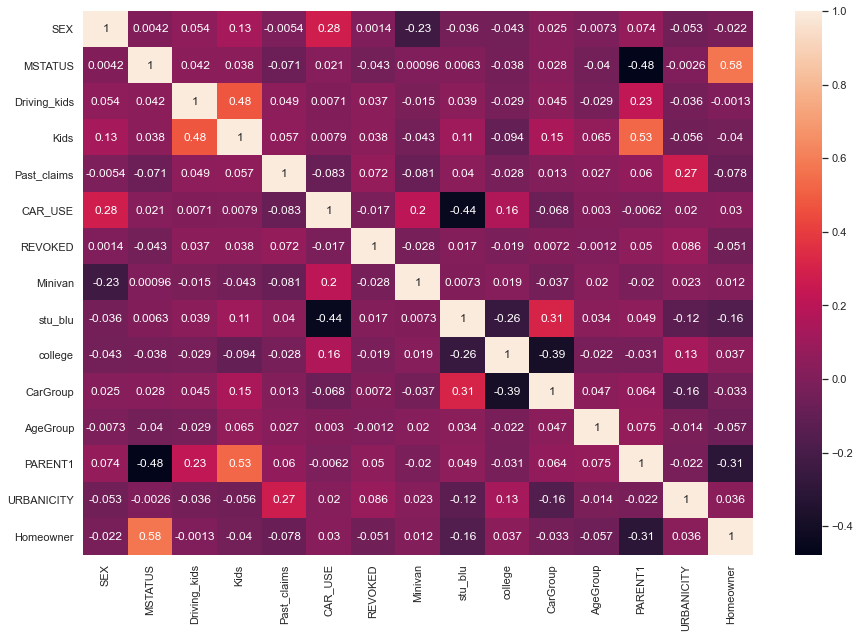

In [139]:
plt.figure(figsize=(15,10))
sns.heatmap(train[["SEX", "MSTATUS", "Driving_kids", "Kids", "Past_claims", "CAR_USE", "REVOKED","Minivan","stu_blu","college","CarGroup","AgeGroup","PARENT1","URBANICITY","Homeowner"]].corr(),annot=True)


* We see some obvious correlations, like between “Married” and “Single_parent” and between “Kids” and “Driving_kids”.
* There is also strong correlation between "student-bluecollar" and "Car_use" because most of driver of commercial car is bluecollar worker
* We find that married individuals are much more likely to own a home (correlation is positive), which makes sense.

# 4-3. Correlation of variables with TARGET_AMT

In [140]:
train.BLUEBOOK

0       14230.0
1       14940.0
2        4010.0
3       15440.0
4       18000.0
         ...   
8156    27330.0
8157    13270.0
8158    24490.0
8159    22550.0
8160    19400.0
Name: BLUEBOOK, Length: 8161, dtype: float64

<AxesSubplot:>

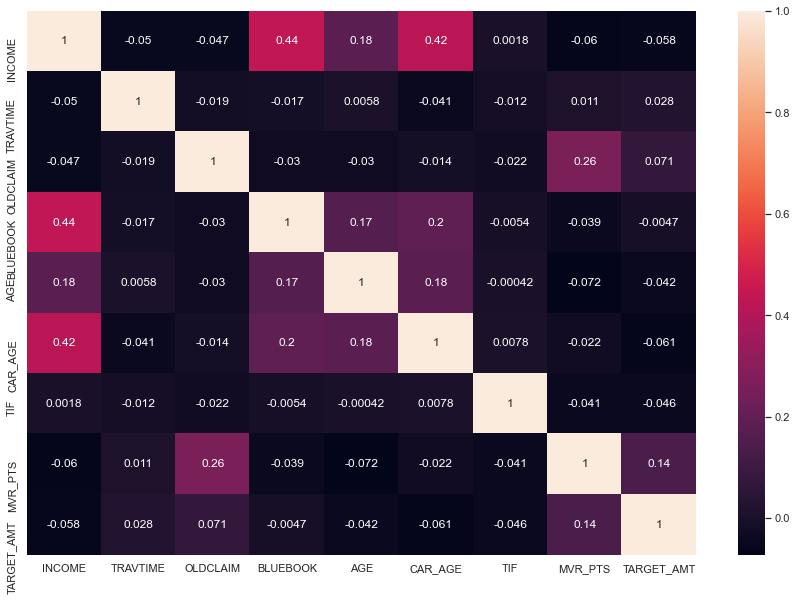

In [141]:
plt.figure(figsize=(15,10))
sns.heatmap(train[["INCOME", "TRAVTIME", "OLDCLAIM", "BLUEBOOK", "AGE", "CAR_AGE", "TIF","MVR_PTS","TARGET_AMT"]].corr(),annot=True)


* There are too few correlation between TARGET_AMT and others. We can improve it using log transformation because the cause of problem could be skewed distribution.

# Standardization

Before applying classification/regression model to our dataset, we need one more preprocessing : Standardization

What is the standardization ? 

The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with

**μ=0 and σ=1**

where μ is the mean (average) and σ is the standard deviation.

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms

However, in our case, when a feature does not follow a normal distribution(right skewed distribution), it would be unwise to use the mean and the standard deviation to scale it. To solve this problem, we can think about **log transformation**.

This phase is quite important even for modeling phase according to the scikit-learn library reference :

*Many elements used in the objective function of a learning algorithm assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.*

In [142]:
pt=PowerTransformer()
train[['log_INCOME','log_BLUEBOOK','log_OLDCLAIM','log_TARGET_AMT']]=pt.fit_transform(train[['INCOME','BLUEBOOK','OLDCLAIM','TARGET_AMT']])


<AxesSubplot:xlabel='log_INCOME', ylabel='Count'>

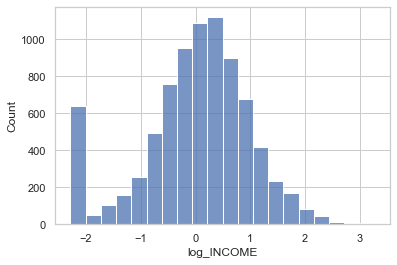

In [143]:
sns.histplot(x='log_INCOME', data=train,bins=20)

<AxesSubplot:xlabel='log_BLUEBOOK', ylabel='Count'>

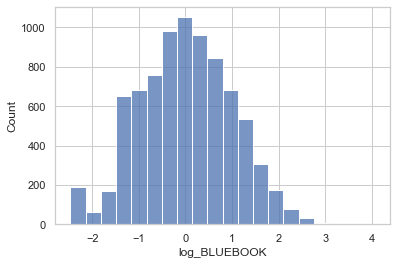

In [144]:
sns.histplot(x='log_BLUEBOOK', data=train,bins=20)

<AxesSubplot:>

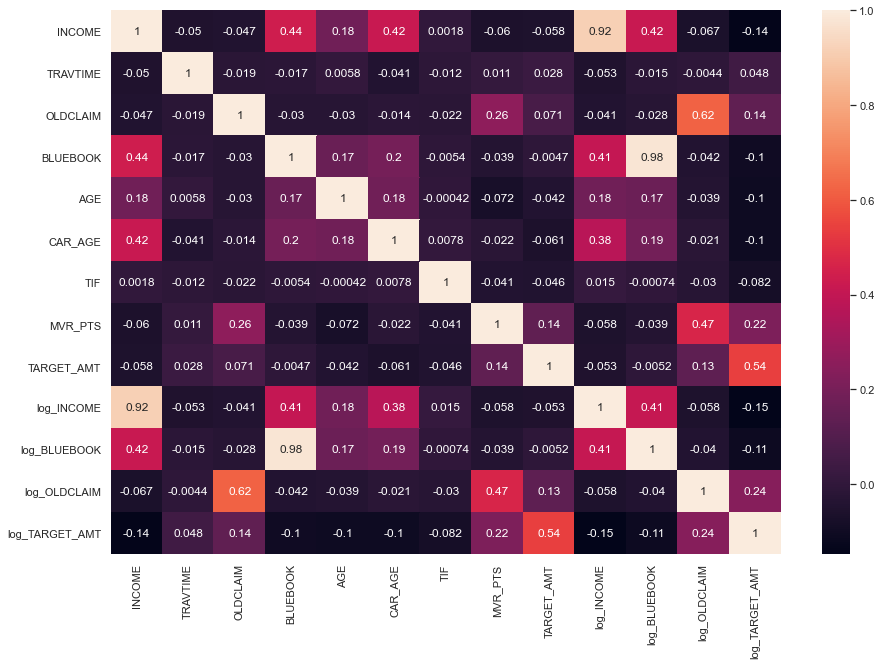

In [145]:
plt.figure(figsize=(15,10))
sns.heatmap(train[["INCOME", "TRAVTIME", "OLDCLAIM", "BLUEBOOK", "AGE", "CAR_AGE", "TIF","MVR_PTS","TARGET_AMT",'log_INCOME','log_BLUEBOOK','log_OLDCLAIM','log_TARGET_AMT']].corr(),annot=True)


Now we can see some correlations :
* log transformed target_AMT with oldclaim(logged or not), MVRPTS
* In contrast to our initial assumptions, Income and bluebook (expensive car) are not strongly related with our target variable.

# 5. Modeling and Evalution for Classification and Regression

In [146]:
train.columns

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION',
       'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY',
       'Driving_kids', 'Kids', 'Past_claims', 'Homeowner', 'Minivan',
       'stu_blu', 'college', 'AgeGroup', 'CarGroup', 'log_INCOME',
       'log_BLUEBOOK', 'log_OLDCLAIM', 'log_TARGET_AMT'],
      dtype='object')

# 5-1. Classification with TARGET_FLAG

I choosed **Random Forest Classifier**. What is Random Forest ? To answner to this question, we need to understand bagging. Bagging is an ensemble algorithm that fits multiple models on different subsets of a training dataset, then combines the predictions from all models. Random forest is an extension of bagging that also randomly selects subsets of features used in each data sample. And for random forest, multiple model means multiple trees. That is the reason why Random Forest can overcome the overfitting problem, ususally happened for Decision Tree model. Furthermore, it works well for both type of variables like categorical and numerical. "Works well" means better performance (accuracy) than simple decision tree.

Before doing classification with Random Forest Classifier, we need to follow sevral stages.

* Firstly, we will exclude the non proper variables which has very weak correlation or replaced with other variables like HOME_VAL -> HOMEOWNER

* Secondly,It is necessary to find a best parameter. For that, we will use GridSearchCV, which iterate a model with defined parameter to find the best accuracy. Eventhough it requires much computational power and time, it is quite simple way to find the good parameter.

* Finally, we will evaluate the model using some metrics like accuracy, AUC score, and F1-score. It is quite important to see F1-score because our target variable TARGET_FLAG is imbalanced. 

In [147]:
X=train.drop(['TARGET_AMT','TARGET_FLAG','YOJ','RED_CAR','TIF','CAR_AGE','CAR_TYPE','EDUCATION','HOME_VAL','INDEX','BLUEBOOK','OLDCLAIM','log_TARGET_AMT'],axis=1) # features
y=train.TARGET_FLAG

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)



# Support Vector Machine

In [ ]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

In [148]:
svm = SVC(C=1,gamma=0.01,probability=True)
svm.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred_class_svm = svm.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_class_svm))
print(classification_report(y_test, y_pred_class_svm))

[[1774   27]
 [ 617   31]]
              precision    recall  f1-score   support

         0.0       0.74      0.99      0.85      1801
         1.0       0.53      0.05      0.09       648

    accuracy                           0.74      2449
   macro avg       0.64      0.52      0.47      2449
weighted avg       0.69      0.74      0.65      2449



In [149]:
# Set up cross_val_score
cv = cross_val_score(estimator=svm,
                     X=X_train,
                     y=y_train,
                     cv=10)

# Print the mean accuracy
print(cv.mean())

0.7356422911589287


In [150]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = svm.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# Logistic Regression 

In [81]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l2')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

C:\Users\taehe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\taehe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\taehe\anaconda3\lib\site-packages

Best CV params {'C': 0.01}
Best CV accuracy 0.746147953047025


C:\Users\taehe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\taehe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [151]:
lr= LogisticRegression(penalty='l2',C=0.01)
lr.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred_class_lr = lr.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_class_lr))
print(classification_report(y_test, y_pred_class_lr))

[[1687  114]
 [ 509  139]]
              precision    recall  f1-score   support

         0.0       0.77      0.94      0.84      1801
         1.0       0.55      0.21      0.31       648

    accuracy                           0.75      2449
   macro avg       0.66      0.58      0.58      2449
weighted avg       0.71      0.75      0.70      2449



In [152]:
# Set up cross_val_score
cv = cross_val_score(estimator=lr,
                     X=X_train,
                     y=y_train,
                     cv=10)

# Print the mean accuracy
print(cv.mean())

C:\Users\taehe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7440513514506508


In [153]:
s=lr.predict_proba(X_test)
s[:,1]

array([0.19898732, 0.21819835, 0.19666486, ..., 0.35851794, 0.14086044,
       0.17268246])

In [154]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lr.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# Randomforest classifier

In [ ]:
rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 5, scoring='accuracy')

clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_)


In [155]:

# Create the classifier with best parameters
rfc = RandomForestClassifier(max_depth= 12, max_features=12)
# Fit the classifier to the training data
rfc.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred_class = rfc.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

[[1684  117]
 [ 401  247]]
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87      1801
         1.0       0.68      0.38      0.49       648

    accuracy                           0.79      2449
   macro avg       0.74      0.66      0.68      2449
weighted avg       0.77      0.79      0.77      2449



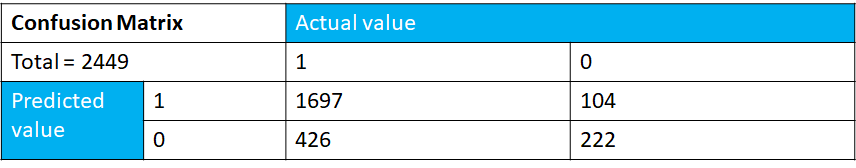

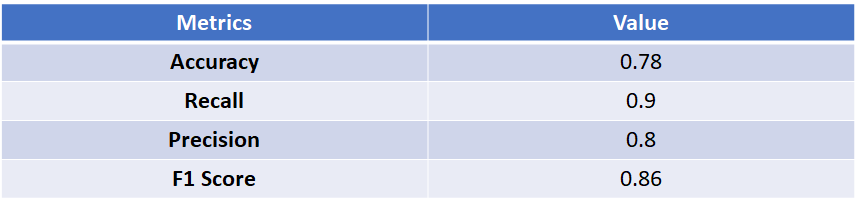

* Our accuracy is not bad, and value of F1 score is also satisfying.
* F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two.
* F1-score combines precision and recall, and works also for cases where the datasets are imbalanced (like ours) as it requires both precision and recall to have a reasonable value

In [156]:
importances_sorted = pd.Series(data=rfc.feature_importances_,
                        index= X_train.columns).sort_values().round(2)

importances_sorted=pd.DataFrame(importances_sorted).rename(columns={0: "Value"})

fig = px.bar(importances_sorted,x='Value' ,orientation='h',text='Value')
fig.update_layout(
    title='Features Importances',
    xaxis=dict(
        title='Importances (%)',
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
        title='Features',
        titlefont_size=16,
        tickfont_size=14,
    ), title_x=0.5,)
fig.show()

In [157]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

* ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
* The ROC curve can be used to choose the best operating point.

# 5-2. Regression with TARGET_AMT

Here, I will also use **Random Forest Regressor**. 

In [158]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [159]:
X=train.drop(['TARGET_AMT','TARGET_FLAG','YOJ','RED_CAR','TIF','CAR_AGE','CAR_TYPE','EDUCATION','HOME_VAL','INDEX','BLUEBOOK','OLDCLAIM','log_TARGET_AMT'],axis=1) # features
y=train.TARGET_AMT

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

rfr = RandomForestRegressor()

forest_params = [{'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2,3],'n_estimators': [100, 200, 300],'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]}]

clf = GridSearchCV(rfr, forest_params, cv = 3, n_jobs = -1, verbose = 2)

clf.fit(X_train, y_train)

best_grid = clf.best_estimator_


In [115]:
grid_accuracy = evaluate(best_grid, X_test, y_test)

print(clf.best_params_)

print(grid_accuracy)

Model Performance
Average Error: 2012.6322 degrees.
Accuracy = -inf%.
{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 200}
-inf


In [160]:
rmse_err = []

rfr = RandomForestRegressor(bootstrap = True,max_depth = 90, max_features=3, min_samples_leaf = 5, min_samples_split = 8, n_estimators = 200).fit(X_train,y_train)
y_pred_reg = rfr.predict(X_test)
rmse_err.append(np.sqrt(mean_squared_error(y_test,y_pred_reg)))
print("RMSE : {}".format(rmse_err[0]))
print("R^2: {}".format(rfr.score(X_test, y_test)))

RMSE : 5224.596954179533
R^2: 0.05650879857914548


In [161]:
importances_sorted = pd.Series(data=rfr.feature_importances_,
                        index= X_train.columns).sort_values().round(2)

importances_sorted=pd.DataFrame(importances_sorted).rename(columns={0: "Value"})

fig = px.bar(importances_sorted,x='Value' ,orientation='h',text='Value')
fig.update_layout(
    title='Features Importances',
    xaxis=dict(
        title='Importances (%)',
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
        title='Features',
        titlefont_size=16,
        tickfont_size=14,
    ), title_x=0.5,)
fig.show()

In [213]:
output_train = pd.DataFrame({'TARGET_FLAG':y_pred_class,'TARGET_AMT': y_pred_reg})
output_train.loc[output_train.TARGET_FLAG ==0,'TARGET_AMT']=0
output_train.head()

,TARGET_FLAG,TARGET_AMT
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,1.0,3434.131411
4,1.0,3144.589951


In [215]:
rmse_err.append(np.sqrt(mean_squared_error(y_test,output_train.TARGET_AMT)))
print("RMSE : {}".format(rmse_err[1]))

RMSE : 1141.4679116909856


To evaluate our regressor's performance, we can choose RMSE (Root Mean Squared Error) because we want to penalize large errors and it use same unit as target variable (here it is $ ). However, our R2 value is too low. Is it normal ? I think yes, because metric Rsquare is used and useful when we want to evaluate "linear model"", meaning linear relationship between target variable and features. But as we already saw in the above chapter, most of variables are not linear with target variable. 

# Gradient Boosting Regressor

In [119]:
gbr = GradientBoostingRegressor(
)
param_grid = {
    'learning_rate': [0.1,0.2,0.3,0.4],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Model Performance
Average Error: 2171.8237 degrees.
Accuracy = -inf%.


In [126]:
grid_accuracy = evaluate(best_grid, X_test, y_test)

print(best_grid)


Model Performance
Average Error: 2171.8237 degrees.
Accuracy = -inf%.
GradientBoostingRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                          n_estimators=200)


In [240]:
gbr = GradientBoostingRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                          n_estimators=200).fit(X_train,y_train)
y_pred_grad = gbr.predict(X_test)
rmse_err.append(np.sqrt(mean_squared_error(y_test,y_pred)))
print("RMSE : {}".format(rmse_err[0]))
print("R^2: {}".format(rfr.score(X_test, y_test)))

RMSE : 5349.288097309721
R^2: 0.06066023533103171


In [241]:
output_train = pd.DataFrame({'TARGET_FLAG':y_pred_class,'TARGET_AMT': y_pred_grad})
output_train.loc[output_train.TARGET_FLAG ==0,'TARGET_AMT']=0
output_train.head()
rmse_err.append(np.sqrt(mean_squared_error(y_test,output_train.TARGET_AMT)))
print("RMSE : {}".format(rmse_err[1]))

RMSE : 1141.4679116909856


# 6. Conclusion

**Initial objective** : our initial objective was to build the classification model (TARGET_FLAG) and the prediction model(TARGET_AMT). For that, we firstly explored the features and discovered correlation between them. Based on previous phase, we reducee & added proper features like HOMEOWNER. After that, we treated missing values using MICE method. Finally, we builed models using Random Forest (both of classifier and of regressor). Eventhough performance of classifier was quite satisfying, that of regressor evaluated by RMSE showed us the point to improve.

**How to improve ?** : 
* To improve the performance of our regressor, we can firstly think about a cause of this problem. Our target variable of regressor, TARGET_AMT is based on TARGET_FLAG. And If TARGET_FLAG were 0, TARGET_AMT should be zero also. However, our dataset is imbalanced. the class 0 of TARGET_FLAG is much more than class 1. If we use some method to make a balanced class like SMOTE, it could be useful. 
* More simply, we can add more proper features.

# 7. Classification and Regression based on Test set

In [129]:
test.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [131]:
conversion_list = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']
for i in conversion_list:
    test[i] = converting(test[i])

<ipython-input-4-67c39e1909d1>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [132]:
test['Driving_kids']=test['KIDSDRIV'].replace([1,2,3,4],1)
test['Kids']=test['HOMEKIDS'].replace([1,2,3,4,5],1)
test['Past_claims']=test['CLM_FREQ'].replace([1,2,3,4,5],1).replace([1,2,3,4,5],1)
test.URBANICITY.replace({"Highly Urban/ Urban":"Urban","z_Highly Rural/ Rural":"Rural"},inplace=True)
test.loc[test.MVR_PTS>10,'MVR_PTS']=10
test['Homeowner']=test.HOME_VAL
test.loc[test.Homeowner>0,'Homeowner']=1

In [137]:
test['Minivan'] = test.CAR_TYPE
test.Minivan.replace({'Minivan' : 1,'Pickup' : 0,'Sports Car':0, 'Panel Truck':0,'Van':0,'z_SUV':0},inplace=True)
test.Minivan

0       0
1       1
2       0
3       0
4       1
       ..
2136    0
2137    1
2138    0
2139    0
2140    0
Name: Minivan, Length: 2141, dtype: int64

In [140]:
test['stu_blu'] = test.JOB
test.stu_blu.replace({'Student' : 1,'z_Blue Collar' : 1,'Clerical':0, 'Professional':0,'Manager':0,'Home Maker':0,'Lawyer':0,'Doctor':0},inplace=True)
test.stu_blu.value_counts()

0.0    1352
1.0     650
Name: stu_blu, dtype: int64

In [164]:
bins= [0,10,30]
labels = ['Young','Old']
test['CarGroup'] = pd.cut(test['CAR_AGE'], bins=bins, labels=labels, right=False)
test.CarGroup.replace({'Young':1,'Old':0},inplace=True)

In [165]:
bins= [0,24,100]
labels = ['Young','Old']
test['AgeGroup'] = pd.cut(test['AGE'], bins=bins, labels=labels, right=False)
test.AgeGroup.replace({'Young':1,'Old':0},inplace=True)


In [143]:
test['college'] = test.EDUCATION
test.college.replace({'Bachelors' : 1,'Masters' : 1,'<High School':1, 'PhD':1,'z_High School':0},inplace=True)
test.college.value_counts()

1    1519
0     622
Name: college, dtype: int64

In [146]:
# Create encoder
labels = LabelEncoder()
binary = test[['SEX','MSTATUS','PARENT1','CAR_USE','RED_CAR','REVOKED','URBANICITY']]
test[['SEX','MSTATUS','PARENT1','CAR_USE','RED_CAR','REVOKED','URBANICITY']]=binary.apply(labels.fit_transform)
test.MSTATUS.replace({0:1,1:0},inplace =True)
test.URBANICITY.replace({'Urban':'Rural','Rural':'Urban'},inplace =True)

ordinary = test[['EDUCATION','JOB','CAR_TYPE','KIDSDRIV','HOMEKIDS','CLM_FREQ','HOMEKIDS']]
test[['EDUCATION','JOB','CAR_TYPE','KIDSDRIV','HOMEKIDS','CLM_FREQ','HOMEKIDS']]=ordinary.apply(labels.fit_transform)

In [160]:
test_copy=test.drop(['TARGET_FLAG','TARGET_AMT'],axis=1).copy(deep = True)
mice_imputer = IterativeImputer()
test_copy.iloc[:, :] = mice_imputer.fit_transform(test)
test = test[['INDEX','TARGET_FLAG','TARGET_AMT']].merge(round(test_copy),on='INDEX')

In [162]:
pt=PowerTransformer()
test[['log_INCOME','log_BLUEBOOK','log_OLDCLAIM']]=pt.fit_transform(test[['INCOME','BLUEBOOK','OLDCLAIM']])


In [217]:
X=test.drop(['TARGET_AMT','TARGET_FLAG','YOJ','RED_CAR','TIF','CAR_AGE','CAR_TYPE','EDUCATION','HOME_VAL','INDEX','BLUEBOOK','OLDCLAIM','log_TARGET_AMT'],axis=1) # features
#y=test.TARGET_FLAG

target_flag = rfc.predict(X)
target_amt = rfr.predict(X)

C:\Users\taehe\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.


C:\Users\taehe\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.




In [228]:
output = pd.DataFrame({'INDEX': test.INDEX, 'TARGET_FLAG': target_flag,'TARGET_AMT': target_amt})
output.loc[output.TARGET_FLAG ==0,'TARGET_AMT']=0
output.round(0)
output.TARGET_FLAG.value_counts()


0.0    2018
1.0     123
Name: TARGET_FLAG, dtype: int64

In [180]:
output.to_csv('submission.csv', index=False)

# What if...?

# We used other imputation method ? 

## KNN Imputation

In [101]:
train = pd.read_csv(r'C:/Users/taehe/Documents/Jupyter Project/train_auto.csv')
conversion_list = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']
for i in conversion_list:
    train[i] = converting(train[i])

train['Driving_kids']=train['KIDSDRIV'].replace([1,2,3,4],1)
train['Kids']=train['HOMEKIDS'].replace([1,2,3,4,5],1)
train['Past_claims']=train['CLM_FREQ'].replace([1,2,3,4,5],1).replace([1,2,3,4,5],1)
train.URBANICITY.replace({"Highly Urban/ Urban":"Urban","z_Highly Rural/ Rural":"Rural"},inplace=True)
train.loc[train.MVR_PTS>10,'MVR_PTS']=10
train['Homeowner']=train.HOME_VAL
train.loc[train.Homeowner>0,'Homeowner']=1

train['Minivan'] = train.CAR_TYPE
train.Minivan.replace({'Minivan' : 1,'Pickup' : 0,'Sports Car':0, 'Panel Truck':0,'Van':0,'z_SUV':0},inplace=True)

train['stu_blu'] = train.JOB
train.stu_blu.replace({'Student' : 1,'z_Blue Collar' : 1,'Clerical':0, 'Professional':0,'Manager':0,'Home Maker':0,'Lawyer':0,'Doctor':0},inplace=True)

bins= [0,10,30]
labels = ['Young','Old']
train['CarGroup'] = pd.cut(train['CAR_AGE'], bins=bins, labels=labels, right=False)
train.CarGroup.replace({'Young':1,'Old':0},inplace=True)

bins= [0,24,100]
labels = ['Young','Old']
train['AgeGroup'] = pd.cut(train['AGE'], bins=bins, labels=labels, right=False)
train.AgeGroup.replace({'Young':1,'Old':0},inplace=True)

train['college'] = train.EDUCATION
train.college.replace({'Bachelors' : 1,'Masters' : 1,'<High School':1, 'PhD':1,'z_High School':0},inplace=True)

# Create encoder
labels = LabelEncoder()
binary = train[['SEX','MSTATUS','PARENT1','CAR_USE','RED_CAR','REVOKED','URBANICITY']]
train[['SEX','MSTATUS','PARENT1','CAR_USE','RED_CAR','REVOKED','URBANICITY']]=binary.apply(labels.fit_transform)
train.MSTATUS.replace({0:1,1:0},inplace =True)
train.URBANICITY.replace({'Urban':'Rural','Rural':'Urban'},inplace =True)

ordinary = train[['EDUCATION','JOB','CAR_TYPE','KIDSDRIV','HOMEKIDS','CLM_FREQ','HOMEKIDS']]
train[['EDUCATION','JOB','CAR_TYPE','KIDSDRIV','HOMEKIDS','CLM_FREQ','HOMEKIDS']]=ordinary.apply(labels.fit_transform)

from fancyimpute import KNN
train_copy=train.drop(['TARGET_FLAG','TARGET_AMT'],axis=1).copy(deep = True)
knn_imputer = KNN()
train_copy.iloc[:, :] = knn_imputer.fit_transform(train_copy)
train = train[['INDEX','TARGET_FLAG','TARGET_AMT']].merge(round(train_copy),on='INDEX')

pt=PowerTransformer()
train[['log_INCOME','log_BLUEBOOK','log_OLDCLAIM','log_TARGET_AMT']]=pt.fit_transform(train[['INCOME','BLUEBOOK','OLDCLAIM','TARGET_AMT']])


X=train.drop(['TARGET_AMT','TARGET_FLAG','YOJ','RED_CAR','TIF','CAR_AGE','CAR_TYPE','EDUCATION','HOME_VAL','INDEX','BLUEBOOK','OLDCLAIM','log_TARGET_AMT'],axis=1) # features
y=train.TARGET_FLAG

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


# Create the classifier with best parameters
rfc = RandomForestClassifier(max_depth= 10, max_features=6)
# Fit the classifier to the training data
rfc.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred_class = rfc.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))


<ipython-input-8-67c39e1909d1>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



Imputing row 1/8161 with 0 missing, elapsed time: 42.241
Imputing row 101/8161 with 1 missing, elapsed time: 42.249
Imputing row 201/8161 with 1 missing, elapsed time: 42.255
Imputing row 301/8161 with 2 missing, elapsed time: 42.261
Imputing row 401/8161 with 2 missing, elapsed time: 42.268
Imputing row 501/8161 with 0 missing, elapsed time: 42.273
Imputing row 601/8161 with 1 missing, elapsed time: 42.279
Imputing row 701/8161 with 0 missing, elapsed time: 42.285
Imputing row 801/8161 with 0 missing, elapsed time: 42.289
Imputing row 901/8161 with 2 missing, elapsed time: 42.294
Imputing row 1001/8161 with 0 missing, elapsed time: 42.297
Imputing row 1101/8161 with 0 missing, elapsed time: 42.303
Imputing row 1201/8161 with 0 missing, elapsed time: 42.308
Imputing row 1301/8161 with 1 missing, elapsed time: 42.312
Imputing row 1401/8161 with 1 missing, elapsed time: 42.318
Imputing row 1501/8161 with 0 missing, elapsed time: 42.324
Imputing row 1601/8161 with 0 missing, elapsed time:

In [102]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

## Mean value imputation

In [103]:
train = pd.read_csv(r'C:/Users/taehe/Documents/Jupyter Project/train_auto.csv')
conversion_list = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']
for i in conversion_list:
    train[i] = converting(train[i])

train['Driving_kids']=train['KIDSDRIV'].replace([1,2,3,4],1)
train['Kids']=train['HOMEKIDS'].replace([1,2,3,4,5],1)
train['Past_claims']=train['CLM_FREQ'].replace([1,2,3,4,5],1).replace([1,2,3,4,5],1)
train.URBANICITY.replace({"Highly Urban/ Urban":"Urban","z_Highly Rural/ Rural":"Rural"},inplace=True)
train.loc[train.MVR_PTS>10,'MVR_PTS']=10
train['Homeowner']=train.HOME_VAL
train.loc[train.Homeowner>0,'Homeowner']=1

train['Minivan'] = train.CAR_TYPE
train.Minivan.replace({'Minivan' : 1,'Pickup' : 0,'Sports Car':0, 'Panel Truck':0,'Van':0,'z_SUV':0},inplace=True)

train['stu_blu'] = train.JOB
train.stu_blu.replace({'Student' : 1,'z_Blue Collar' : 1,'Clerical':0, 'Professional':0,'Manager':0,'Home Maker':0,'Lawyer':0,'Doctor':0},inplace=True)

bins= [0,10,30]
labels = ['Young','Old']
train['CarGroup'] = pd.cut(train['CAR_AGE'], bins=bins, labels=labels, right=False)
train.CarGroup.replace({'Young':1,'Old':0},inplace=True)

bins= [0,24,100]
labels = ['Young','Old']
train['AgeGroup'] = pd.cut(train['AGE'], bins=bins, labels=labels, right=False)
train.AgeGroup.replace({'Young':1,'Old':0},inplace=True)

train['college'] = train.EDUCATION
train.college.replace({'Bachelors' : 1,'Masters' : 1,'<High School':1, 'PhD':1,'z_High School':0},inplace=True)

# Create encoder
labels = LabelEncoder()
binary = train[['SEX','MSTATUS','PARENT1','CAR_USE','RED_CAR','REVOKED','URBANICITY']]
train[['SEX','MSTATUS','PARENT1','CAR_USE','RED_CAR','REVOKED','URBANICITY']]=binary.apply(labels.fit_transform)
train.MSTATUS.replace({0:1,1:0},inplace =True)
train.URBANICITY.replace({'Urban':'Rural','Rural':'Urban'},inplace =True)

ordinary = train[['EDUCATION','JOB','CAR_TYPE','KIDSDRIV','HOMEKIDS','CLM_FREQ','HOMEKIDS']]
train[['EDUCATION','JOB','CAR_TYPE','KIDSDRIV','HOMEKIDS','CLM_FREQ','HOMEKIDS']]=ordinary.apply(labels.fit_transform)

from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
train_copy.iloc[:, :] = mean_imputer.fit_transform(train_copy)
train = train[['INDEX','TARGET_FLAG','TARGET_AMT']].merge(round(train_copy),on='INDEX')

pt=PowerTransformer()
train[['log_INCOME','log_BLUEBOOK','log_OLDCLAIM','log_TARGET_AMT']]=pt.fit_transform(train[['INCOME','BLUEBOOK','OLDCLAIM','TARGET_AMT']])


X=train.drop(['TARGET_AMT','TARGET_FLAG','YOJ','RED_CAR','TIF','CAR_AGE','CAR_TYPE','EDUCATION','HOME_VAL','INDEX','BLUEBOOK','OLDCLAIM','log_TARGET_AMT'],axis=1) # features
y=train.TARGET_FLAG

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


# Create the classifier with best parameters
rfc = RandomForestClassifier(max_depth= 10, max_features=6)
# Fit the classifier to the training data
rfc.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred_class = rfc.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))


<ipython-input-8-67c39e1909d1>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



[[1704   97]
 [ 421  227]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1801
           1       0.70      0.35      0.47       648

    accuracy                           0.79      2449
   macro avg       0.75      0.65      0.67      2449
weighted avg       0.78      0.79      0.76      2449



In [104]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()